### <center>Mushroom Classification</center>
#### <center>EDA - Exploratory Data Analysis</center>
#### <center>Domain - Agriculture</center>
#### <center>Author - syed mansoor</center>
##### Problem Statement :
The Audubon Society Field Guide to North American Mushrooms contains descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom (1981). Each species is labelled as either definitely edible, definitely poisonous, or maybe edible but not recommended. This last category was merged with the toxic category. The Guide asserts unequivocally that there is no simple rule for judging a mushroom's edibility, such as "leaflets three, leave it be" for Poisonous Oak and Ivy. The main goal is to predict which mushroom is poisonous & which is edible.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
# import the data
mushroom = pd.read_csv("/Mushroom_classification/notebooks\mushrooms.csv")

# check the first five records
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


#### Attribute Information:

classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

We will replace these values with the original column values to understand data better.

In [3]:
mushroom = mushroom.replace({
    "class":{'e':'edible','p':'poisonous'},
    "cap-shape":{'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'},
    "cap-surface":{'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'},
    "cap-color":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'},
    "bruises":{'t':'yes','f':'no'},
    "odor":{'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'},
    "gill-attachment":{'a':'attached','d':'descending','f':'free','n':'notched'},
    "gill-spacing":{'c':'close','w':'crowded','d':'distant'},
    "gill-size":{'b':'broad','n':'narrow'},
    "gill-color":{'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red',
                  'w':'white','y':'yellow'},
    "stalk-shape":{'e':'enlarging','t':'tapering'},
    "stalk-root":{'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted'},
    "stalk-surface-above-ring":{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
    "stalk-surface-below-ring":{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
    "stalk-color-above-ring":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
    "stalk-color-below-ring":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
    "veil-type":{'p':'partial','u':'universal'},
    "veil-color":{'n':'brown','o':'orange','w':'white','y':'yellow'},
    "ring-number":{'n':'none','o':'one','t':'two'},
    "ring-type":{'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'},
    "spore-print-color":{'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'},
    "population":{'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'},
    "habitat":{'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'}  
})

In [4]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [5]:
# dimension of the data
mushroom.shape

(8124, 23)

In [6]:
# datatypes present
mushroom.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
# descriptive statistics
mushroom.describe(include="all").transpose()

,count,unique,top,freq
class,8124,2,edible,4208
cap-shape,8124,6,convex,3656
cap-surface,8124,4,scaly,3244
cap-color,8124,10,brown,2284
bruises,8124,2,no,4748
odor,8124,9,none,3528
gill-attachment,8124,2,free,7914
gill-spacing,8124,2,close,6812
gill-size,8124,2,broad,5612
gill-color,8124,12,buff,1728


In [8]:
# concise summary
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
# check for duplicate records
mushroom.duplicated().sum()

0

In [10]:
# Check for the null / missing values in our data
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

As we can see that there no missing/null values in the dataset. However, if you go through the data description you will find that the missing values in one column is replaced with "?". We need to handle this missing values.

In [11]:
for i in mushroom.columns:
    missing = mushroom[i][mushroom[i]=='?'].count()
    if missing != 0:
        print(i, missing)

stalk-root 2480


There are 2480 missing values in 'stalk-root' column. First we will replace this values with np.nan so that we can handle missing data.

In [12]:
mushroom['stalk-root'] = mushroom['stalk-root'].replace(to_replace='?', value=np.nan)
mushroom['stalk-root'] = mushroom['stalk-root'].replace(to_replace='nan', value=np.nan)
mushroom['stalk-root'] = mushroom['stalk-root'].replace(to_replace='NaN', value=np.nan)  # Also cover this


In [13]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


# Replace '?' and variations of NaN with np.nan
mushroom['stalk-root'] = mushroom['stalk-root'].replace(to_replace=['?', 'nan', 'NaN'], value=np.nan)

# Check unique values after replacement
print("\nUnique values after replacement:")
print(mushroom['stalk-root'].unique())

# Convert to object type
mushroom['stalk-root'] = mushroom['stalk-root'].astype(object)

# Print current state and data types
print("\nDataFrame after conversion:")
print(mushroom)
print("\nData types:")
print(mushroom.dtypes)

# Check for hidden characters
print("\nChecking for hidden characters or unexpected types:")
for value in mushroom['stalk-root']:
    print(f"Value: {value}, Type: {type(value)}")

# Initialize the SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Try to impute
try:
    mushroom['stalk-root'] = impute.fit_transform(mushroom[['stalk-root']])
    print("\nData after imputation:")
    print(mushroom)
except ValueError as e:
    print("ValueError:", e)

# Check the count of NaN values
print("\nNaN count in 'stalk-root':", mushroom['stalk-root'].isnull().sum())



Unique values after replacement:
['equal' 'club' 'bulbous' 'rooted' nan]

DataFrame after conversion:
          class cap-shape cap-surface cap-color bruises     odor  \
0     poisonous    convex      smooth     brown     yes  pungent   
1        edible    convex      smooth    yellow     yes   almond   
2        edible      bell      smooth     white     yes    anise   
3     poisonous    convex       scaly     white     yes  pungent   
4        edible    convex      smooth      gray      no     none   
...         ...       ...         ...       ...     ...      ...   
8119     edible   knobbed      smooth     brown      no     none   
8120     edible    convex      smooth     brown      no     none   
8121     edible      flat      smooth     brown      no     none   
8122  poisonous   knobbed       scaly     brown      no    fishy   
8123     edible    convex      smooth     brown      no     none   

     gill-attachment gill-spacing gill-size gill-color stalk-shape stalk-root  \

Now we will impute the missing values in 'stalk-root' column using sklearn SimpleImputer

In [14]:
# Lets check how many unique values are present in each columns
for i in mushroom.columns:
    print(i,":",mushroom[i].nunique(),"\n",mushroom[i].unique(),"\n")

class : 2 
 ['poisonous' 'edible'] 

cap-shape : 6 
 ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical'] 

cap-surface : 4 
 ['smooth' 'scaly' 'fibrous' 'grooves'] 

cap-color : 10 
 ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green'] 

bruises : 2 
 ['yes' 'no'] 

odor : 9 
 ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty'] 

gill-attachment : 2 
 ['free' 'attached'] 

gill-spacing : 2 
 ['close' 'crowded'] 

gill-size : 2 
 ['narrow' 'broad'] 

gill-color : 12 
 ['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange'] 

stalk-shape : 2 
 ['enlarging' 'tapering'] 

stalk-root : 4 
 ['equal' 'club' 'bulbous' 'rooted' nan] 

stalk-surface-above-ring : 4 
 ['smooth' 'fibrous' 'silky' 'scaly'] 

stalk-surface-below-ring : 4 
 ['smooth' 'fibrous' 'scaly' 'silky'] 

stalk-color-above-ring : 9 
 ['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow'] 

stalk-color-below

From above data we can see that 'veil-type' has only one value throughout the data. So it won't give us much information regarding the class of the mushroom. So we will drop this column.

In [15]:
mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [16]:
mushroom = mushroom.drop(['veil-type'],axis=1)

In [17]:
mushroom.to_csv('mushroom_data.csv',header = True ,index = False)

### Exploratory Data Analysis
#### Univariate Analysis

In [18]:
for i in mushroom.columns:
    print(i,":\n",mushroom[i].value_counts(),"\n")

class :
 class
edible       4208
poisonous    3916
Name: count, dtype: int64 

cap-shape :
 cap-shape
convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: count, dtype: int64 

cap-surface :
 cap-surface
scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: count, dtype: int64 

cap-color :
 cap-color
brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: count, dtype: int64 

bruises :
 bruises
no     4748
yes    3376
Name: count, dtype: int64 

odor :
 odor
none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: count, dtype: int64 

gill-attachment :
 gill-attachment
free        7914
attached     210
Name: count, dtype: int64 

gill-spacing :
 gill-spacing
close      6812
crowded    1312
Name: count

let's plot above data using seaborn and matplotlib

##### class, bruises, odor

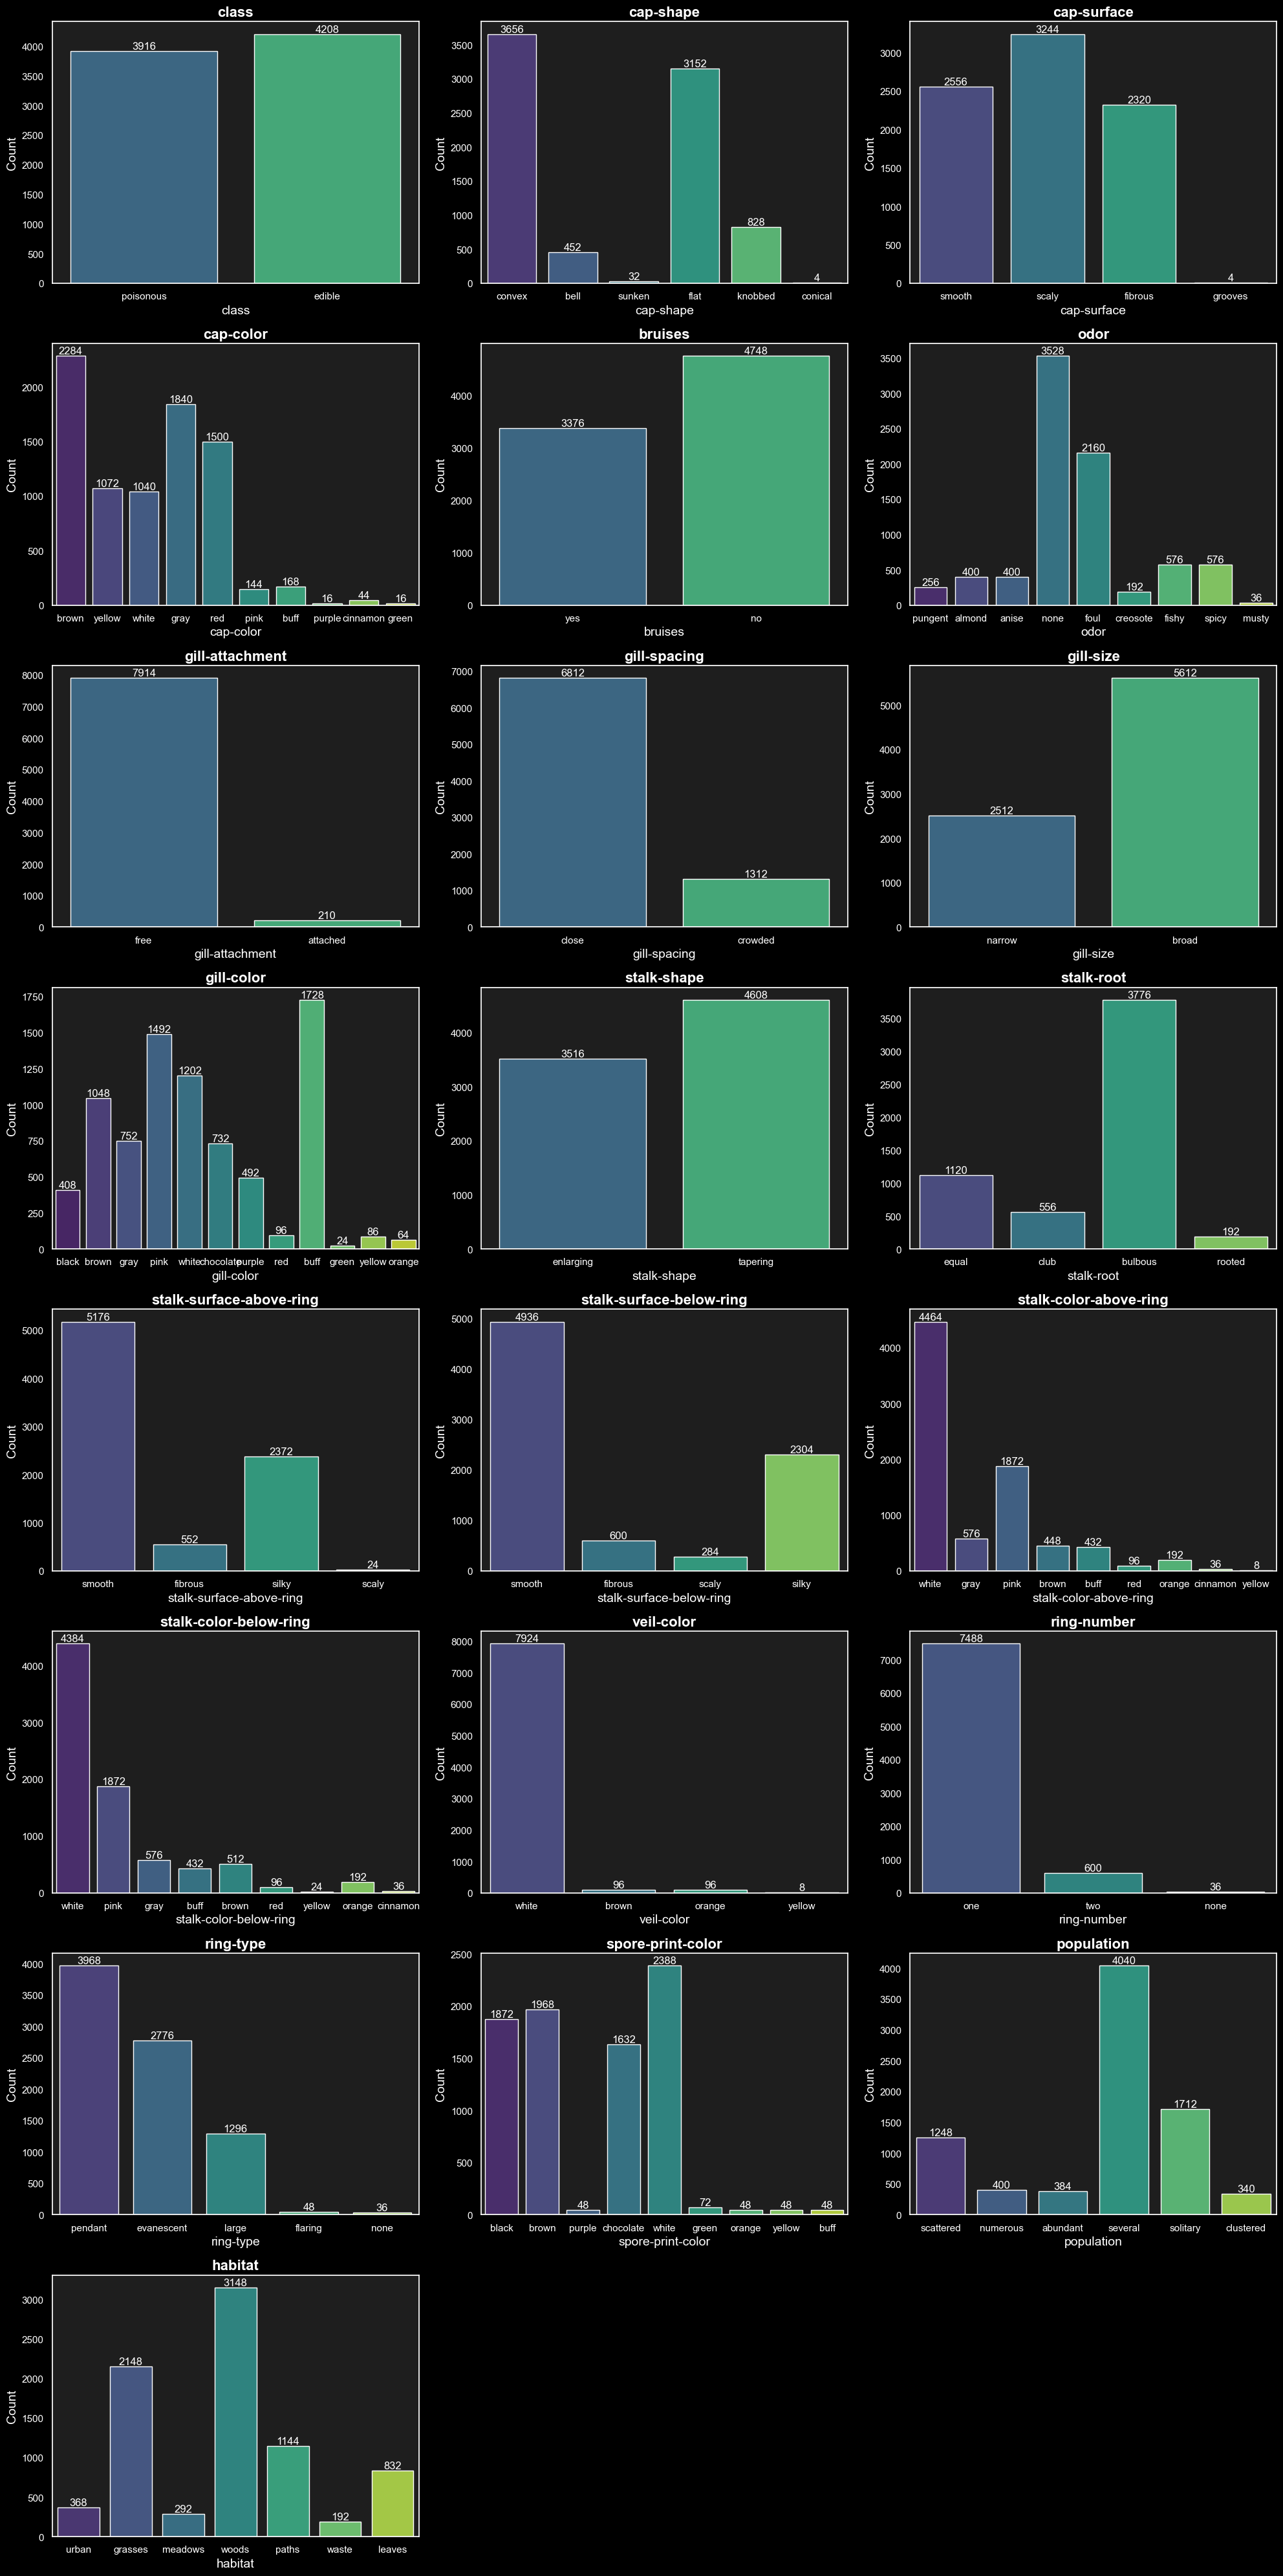

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a dark style for the plots

# Define the number of rows and columns for the grid
num_feats = len(mushroom.columns)
cols = 3  # Number of columns for the grid
rows = (num_feats // cols) + (num_feats % cols > 0)  # Calculate number of rows needed

plt.figure(figsize=(20, rows * 5))  # Set figure size

# Create bar plots for each feature
for i, feat in enumerate(mushroom.columns):
    ax = plt.subplot(rows, cols, i + 1)  # Create a subplot
    bars = sns.countplot(x=feat, data=mushroom, ax=ax, palette='viridis')  # Change to x-axis for countplot
    ax.set_title(feat, fontsize=16, fontweight='bold', color='white')
    ax.set_xlabel(feat, fontsize=14, color='white')
    ax.set_ylabel('Count', fontsize=14, color='white')
    ax.tick_params(axis='y', colors='white')  # Change y-axis tick color
    ax.tick_params(axis='x', colors='white')  # Change x-axis tick color
    ax.set_facecolor('#1e1e1e')  # Dark background for each subplot

    # Add labels on the bars
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                int(bar.get_height()), ha='center', va='bottom', fontsize=12, color='white')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


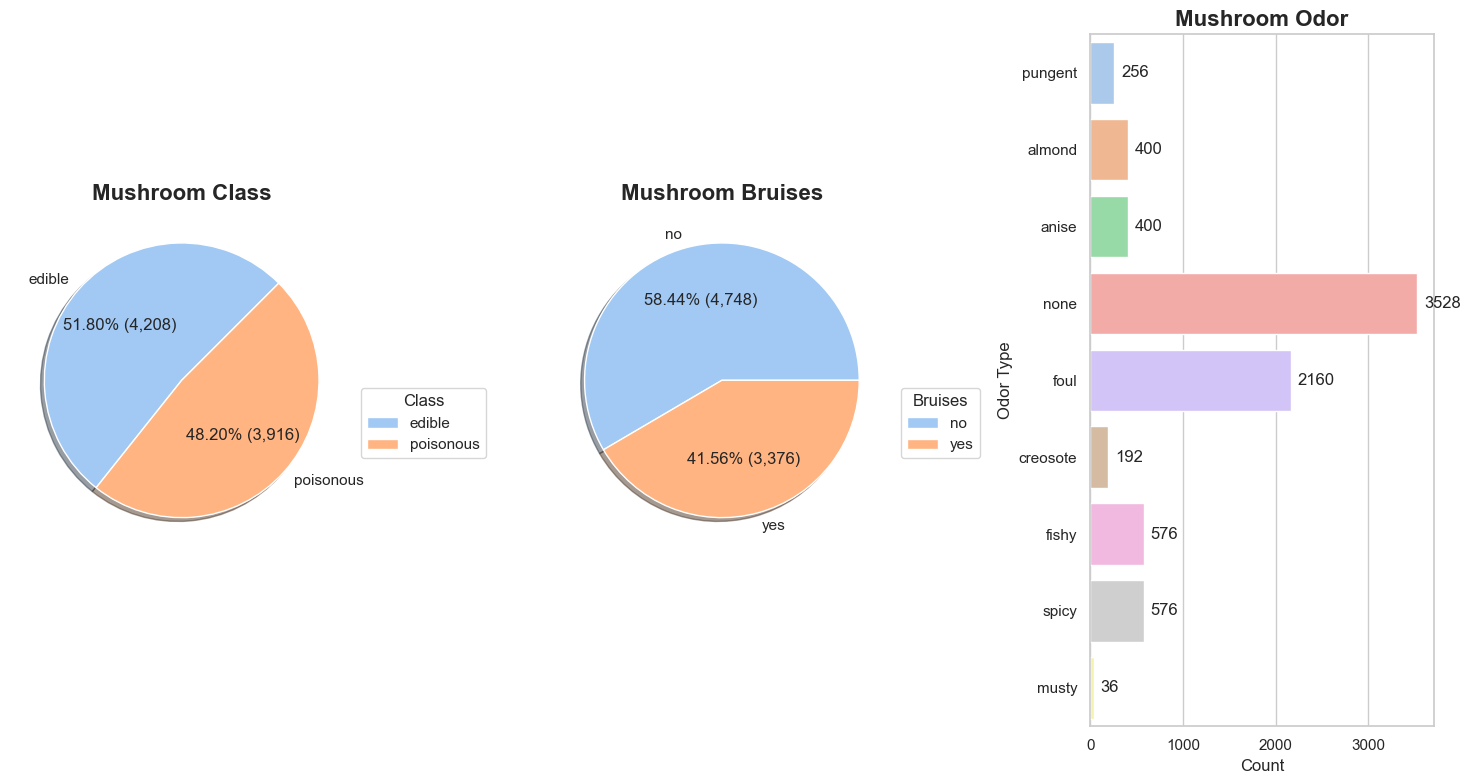

In [20]:


# Set a style for the plots
sns.set(style='whitegrid')

plt.figure(figsize=(20, 8))

# Class
ax1 = plt.subplot2grid((1, 4), (0, 0))

dataClass = mushroom['class'].value_counts().values
labelClass = mushroom['class'].value_counts().index

plt.pie(x=dataClass, labels=labelClass,
        autopct=lambda p: '{:.2f}% ({:,.0f})'.format(p, p * sum(dataClass) / 100),
        colors=sns.color_palette("pastel", len(labelClass)),
        shadow=True, startangle=45)
plt.legend(labelClass, loc='best', title='Class', bbox_to_anchor=(1, 0.5))
plt.title("Mushroom Class", fontsize=16, fontweight='bold')

# Bruises
ax2 = plt.subplot2grid((1, 4), (0, 1))

dataBruises = mushroom['bruises'].value_counts().values
labelBruises = mushroom['bruises'].value_counts().index

plt.pie(x=dataBruises, labels=labelBruises,
        autopct=lambda p: '{:.2f}% ({:,.0f})'.format(p, p * sum(dataBruises) / 100),
        colors=sns.color_palette("pastel", len(labelBruises)),
        shadow=True)
plt.legend(labelBruises, loc='best', title='Bruises', bbox_to_anchor=(1, 0.5))
plt.title("Mushroom Bruises", fontsize=16, fontweight='bold')

# Odor
ax3 = plt.subplot2grid((1, 4), (0, 2))

sns.countplot(y='odor', data=mushroom, ax=ax3, palette='pastel')
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.0f', label_type='edge', padding=5)

ax3.set_title("Mushroom Odor", fontsize=16, fontweight='bold')
ax3.set_xlabel("Count", fontsize=12)
ax3.set_ylabel("Odor Type", fontsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


##### cap-shape, cap-surface, cap-color

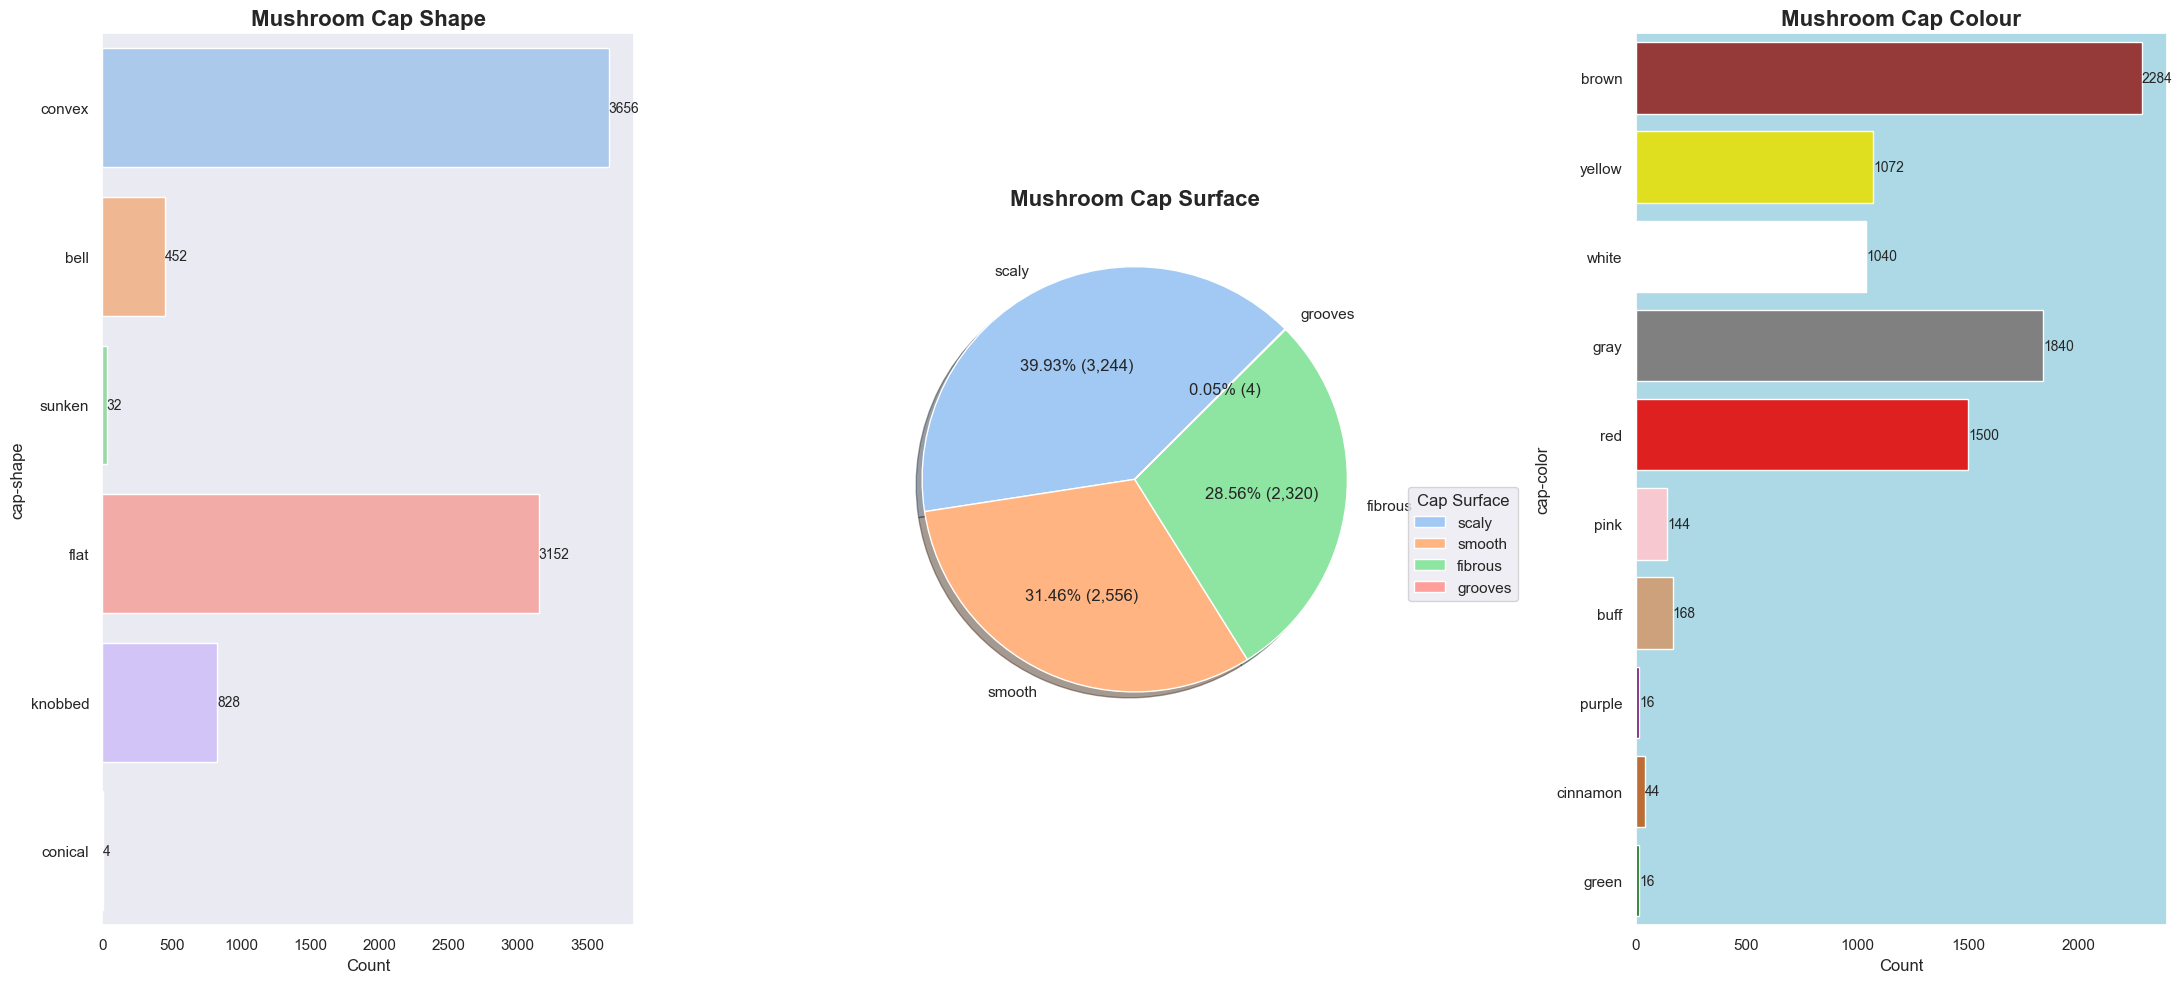

In [21]:

# Set a style for the plots
sns.set(style='dark')

plt.figure(figsize=(22, 10))

# Cap Shape
ax1 = plt.subplot2grid((1, 3), (0, 0))

sns.countplot(y="cap-shape", data=mushroom, ax=ax1, palette='pastel')
for i in ax1.containers:
    ax1.bar_label(i, fontsize=10)
ax1.set_title("Mushroom Cap Shape", fontsize=16, fontweight='bold')
ax1.set_xlabel("Count", fontsize=12)

# Cap Surface
ax2 = plt.subplot2grid((1, 3), (0, 1))

dataCapSurface = mushroom['cap-surface'].value_counts().values
labelCapSurface = mushroom['cap-surface'].value_counts().index

plt.pie(x=dataCapSurface, labels=labelCapSurface,
        autopct=lambda p: '{:.2f}% ({:,.0f})'.format(p, p * sum(dataCapSurface) / 100),
        colors=sns.color_palette("pastel", len(labelCapSurface)),
        shadow=True, startangle=45)
plt.legend(labelCapSurface, loc='upper left', title='Cap Surface', bbox_to_anchor=(1, 0.5))
plt.title("Mushroom Cap Surface", fontsize=16, fontweight='bold')

# Cap Color
ax3 = plt.subplot2grid((1, 3), (0, 2))

sns.countplot(y='cap-color', data=mushroom, ax=ax3, palette=['#A52A2A', '#FFFF00', '#FFFFFF', '#808080',
                                                              '#FF0000', '#FFC0CB', '#DAA06D', '#800080',
                                                              '#D2691E', '#008000'])
for i in ax3.containers:
    ax3.bar_label(i, fontsize=10)
ax3.set_facecolor('lightblue')
ax3.set_title("Mushroom Cap Colour", fontsize=16, fontweight='bold')
ax3.set_xlabel("Count", fontsize=12)

# Improve layout and show the plot
plt.tight_layout()
plt.show()


##### gill-attachment, gill-spacing, gill-size, gill-color

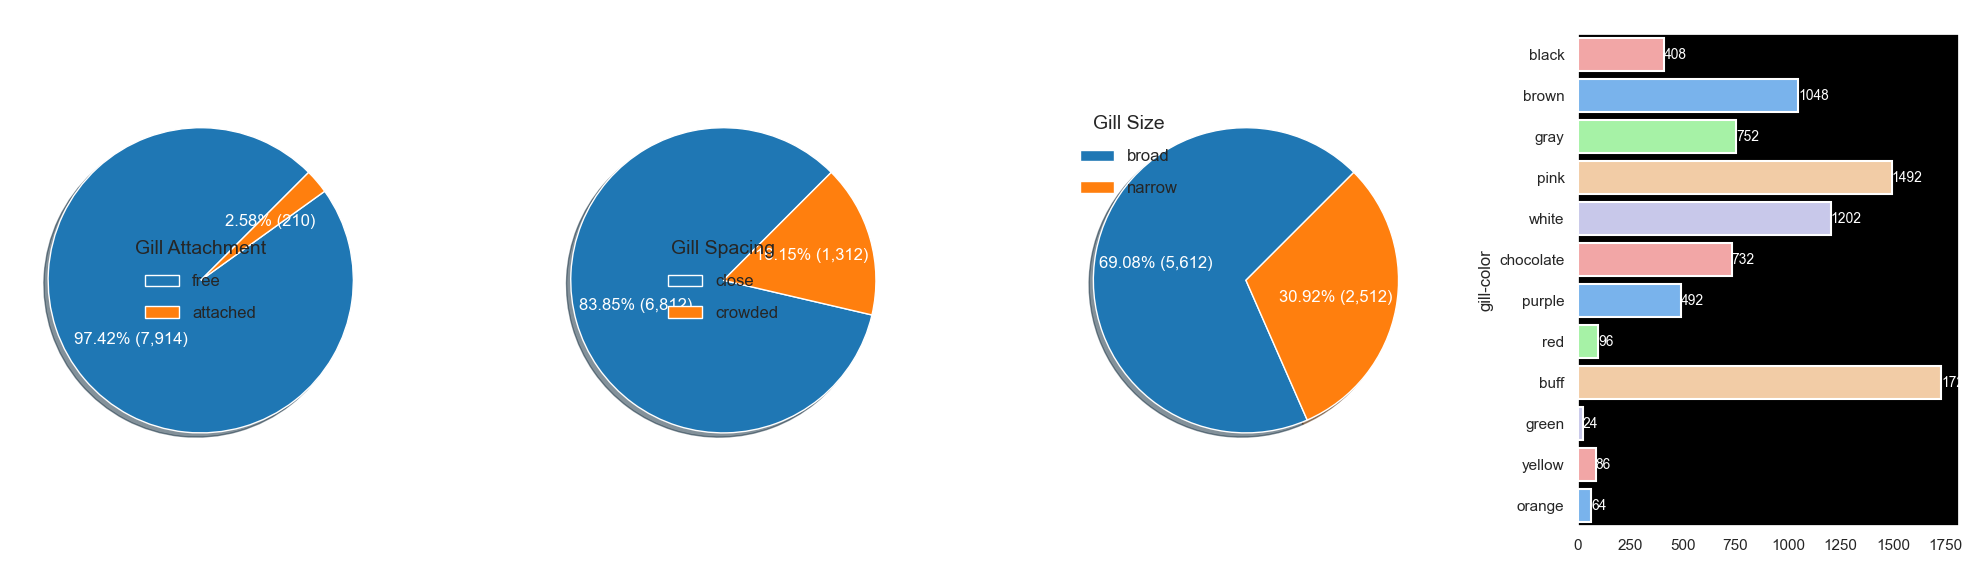

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a dark style for the plots

# Define a color palette suitable for a dark background
pie_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
count_palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

plt.figure(figsize=(20, 6))  # Increased figure size for better visibility

# Gill Attachment
ax1 = plt.subplot2grid((1, 4), (0, 0))

dataGillAttachment = mushroom['gill-attachment'].value_counts().values
labelGillAttachment = mushroom['gill-attachment'].value_counts().index

plt.pie(x=dataGillAttachment, labels=labelGillAttachment,
        autopct=lambda p: '{:.2f}% ({:,.0f})'.format(p, p * sum(dataGillAttachment) / 100),
        shadow=True, startangle=45,
        colors=pie_colors,  # Updated vibrant colors
        textprops={'color': 'white'})  # Change text color to white
plt.legend(labelGillAttachment, loc='best', title='Gill Attachment', facecolor='black', fontsize=12, title_fontsize='14', frameon=False, labelspacing=1, borderpad=1)
plt.title("Mushroom Gill Attachment", fontsize=16, fontweight='bold', color='white')

# Gill Spacing
ax2 = plt.subplot2grid((1, 4), (0, 1))

dataGillSpacing = mushroom['gill-spacing'].value_counts().values
labelGillSpacing = mushroom['gill-spacing'].value_counts().index

plt.pie(x=dataGillSpacing, labels=labelGillSpacing,
        autopct=lambda p: '{:.2f}% ({:,.0f})'.format(p, p * sum(dataGillSpacing) / 100),
        shadow=True, startangle=45,
        colors=pie_colors,  # Updated vibrant colors
        textprops={'color': 'white'})  # Change text color to white
plt.legend(labelGillSpacing, loc='best', title='Gill Spacing', facecolor='black', fontsize=12, title_fontsize='14', frameon=False, labelspacing=1, borderpad=1)
plt.title("Mushroom Gill Spacing", fontsize=16, fontweight='bold', color='white')

# Gill Size
ax3 = plt.subplot2grid((1, 4), (0, 2))

dataGillSize = mushroom['gill-size'].value_counts().values
labelGillSize = mushroom['gill-size'].value_counts().index

plt.pie(x=dataGillSize, labels=labelGillSize,
        autopct=lambda p: '{:.2f}% ({:,.0f})'.format(p, p * sum(dataGillSize) / 100),
        shadow=True, startangle=45,
        colors=pie_colors,  # Updated vibrant colors
        textprops={'color': 'white'})  # Change text color to white
plt.legend(labelGillSize, loc='best', title='Gill Size', facecolor='black', fontsize=12, title_fontsize='14', frameon=False, labelspacing=1, borderpad=1)
plt.title("Mushroom Gill Size", fontsize=16, fontweight='bold', color='white')

# Gill Color
ax4 = plt.subplot2grid((1, 4), (0, 3))

sns.countplot(y='gill-color', data=mushroom, ax=ax4, 
              palette=count_palette, linewidth=1.5)  # Using a vibrant palette for count plot
for i in ax4.containers:
    ax4.bar_label(i, fontsize=10, color='white')  # Change bar label color to white
ax4.set_facecolor('black')  # Set countplot background to black
ax4.set_title("Mushroom Gill Color", fontsize=16, fontweight='bold', color='white')
ax4.set_xlabel("Count", fontsize=12, color='white')

# Improve layout and show the plot
plt.tight_layout()
plt.show()


##### stalk-shape, stalk-root

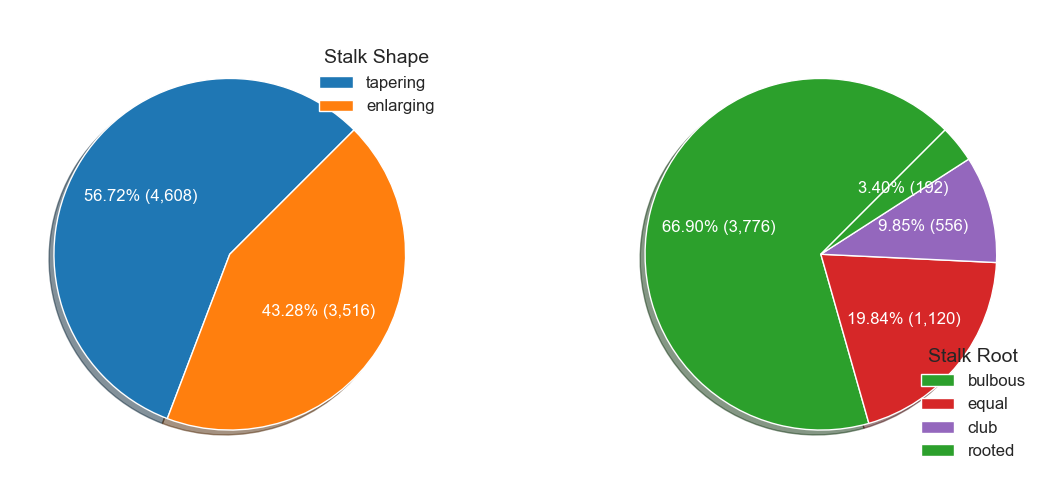

In [23]:
import matplotlib.pyplot as plt

# Set a dark style for the plots


plt.figure(figsize=(12, 5))  # Set figure size

# Stalk Shape
ax1 = plt.subplot2grid((1, 2), (0, 0))

dataStalkShape = mushroom['stalk-shape'].value_counts().values
labelStalkShape = mushroom['stalk-shape'].value_counts().index

plt.pie(x=dataStalkShape, labels=labelStalkShape,
        autopct=lambda p: '{:.2f}% ({:,.0f})'.format(p, p * sum(dataStalkShape) / 100),
        shadow=True, startangle=45,
        colors=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Vibrant colors
        textprops={'color': 'white'})  # Change text color to white
plt.legend(labelStalkShape, loc='best', title='Stalk Shape', facecolor='black', fontsize=12, title_fontsize='14', frameon=False)
plt.title("Mushroom Stalk Shape", fontsize=16, fontweight='bold', color='white')

# Stalk Root
ax2 = plt.subplot2grid((1, 2), (0, 1))

dataStalkRoot = mushroom['stalk-root'].value_counts().values
labelStalkRoot = mushroom['stalk-root'].value_counts().index

plt.pie(x=dataStalkRoot, labels=labelStalkRoot,
        autopct=lambda p: '{:.2f}% ({:,.0f})'.format(p, p * sum(dataStalkRoot) / 100),
        shadow=True, startangle=45,
        colors=['#2ca02c', '#d62728', '#9467bd'],  # Vibrant colors
        textprops={'color': 'white'})  # Change text color to white
plt.legend(labelStalkRoot, loc='best', title='Stalk Root', facecolor='black', fontsize=12, title_fontsize='14', frameon=False)
plt.title("Mushroom Stalk Root", fontsize=16, fontweight='bold', color='white')

# Improve layout and show the plot
plt.tight_layout()
plt.show()

##### stalk-surface-above-ring, stalk-surface-below-ring

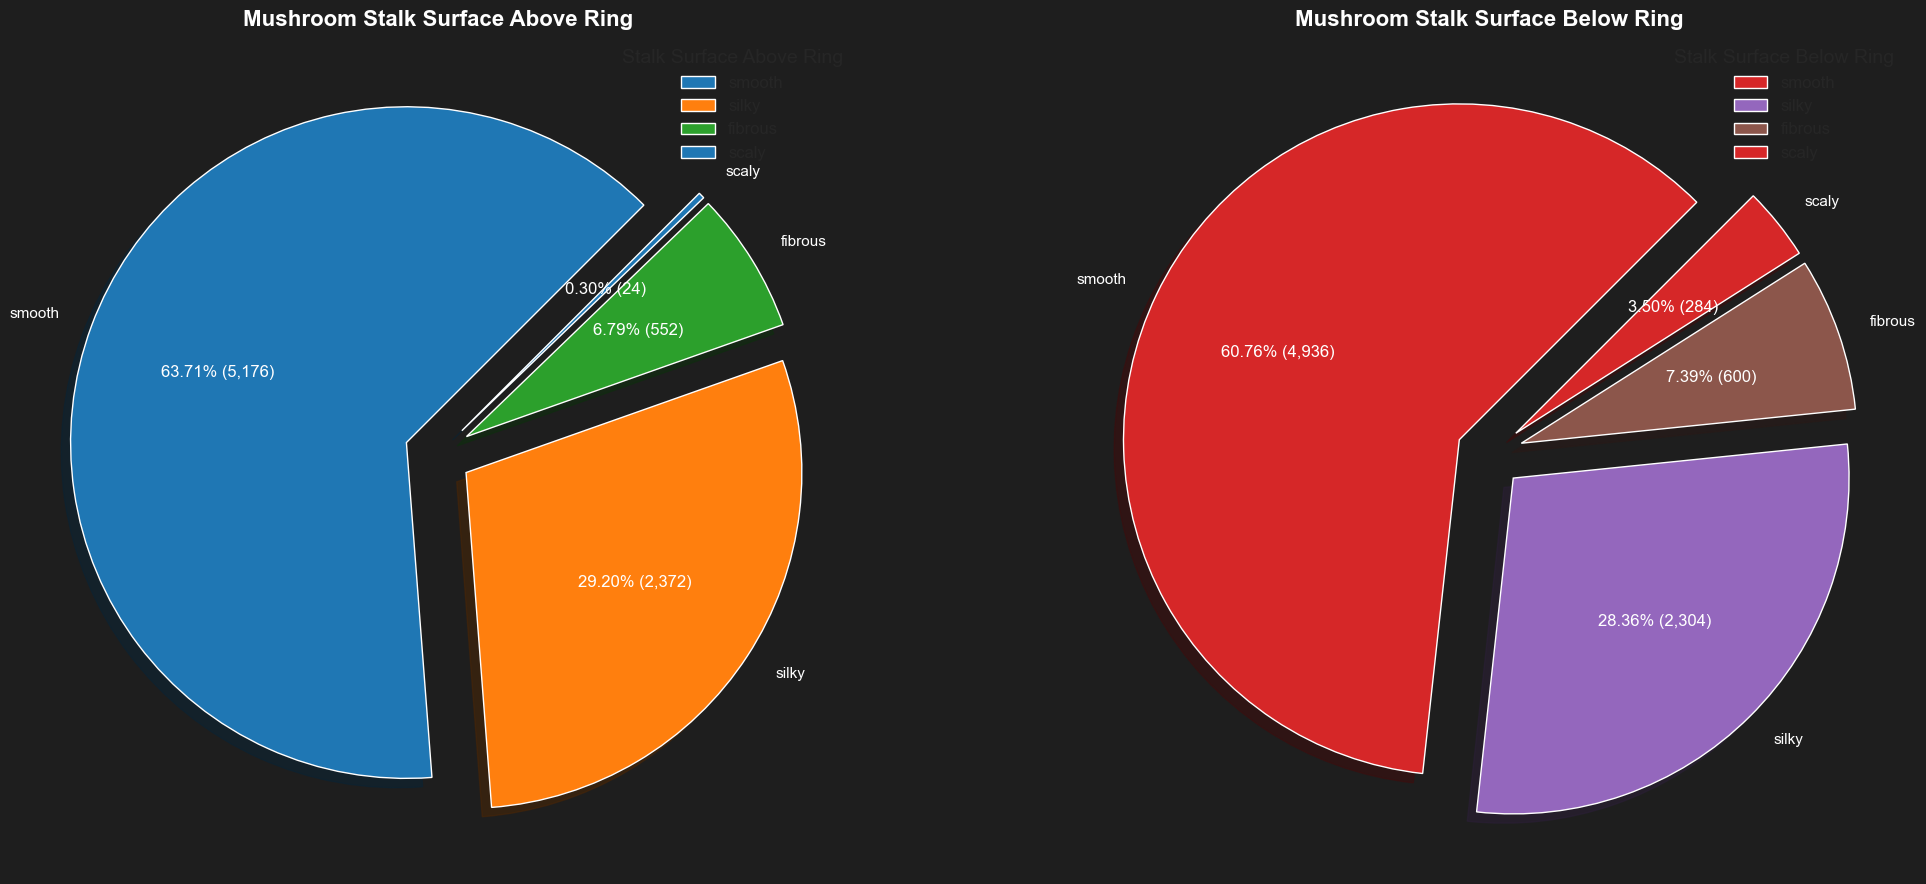

In [24]:
import matplotlib.pyplot as plt

# Set a solid color for the figure background
plt.figure(figsize=(22, 9), facecolor='#1e1e1e')  # Dark gray background

# Stalk Surface Above Ring
ax1 = plt.subplot2grid((1, 2), (0, 0))

dataStalkSurfaceAboveRing = mushroom['stalk-surface-above-ring'].value_counts().values
labelStalkSurfaceAboveRing = mushroom['stalk-surface-above-ring'].value_counts().index

# Create a 3D-like pie chart by adding an explode effect
explode = [0.1] * len(labelStalkSurfaceAboveRing)  # Slightly explode all slices

plt.pie(x=dataStalkSurfaceAboveRing, labels=labelStalkSurfaceAboveRing,
        autopct=lambda p: '{:.2f}% ({:,.0f})'.format(p, p * sum(dataStalkSurfaceAboveRing) / 100),
        shadow=True, startangle=45, explode=explode,
        colors=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Vibrant colors
        textprops={'color': 'white'})  # Change text color to white
plt.legend(labelStalkSurfaceAboveRing, loc='best', title='Stalk Surface Above Ring',
           facecolor='black', fontsize=12, title_fontsize='14', frameon=False)
plt.title("Mushroom Stalk Surface Above Ring", fontsize=16, fontweight='bold', color='white')

# Stalk Surface Below Ring
ax2 = plt.subplot2grid((1, 2), (0, 1))

dataStalkSurfaceBelowRing = mushroom['stalk-surface-below-ring'].value_counts().values
labelStalkSurfaceBelowRing = mushroom['stalk-surface-below-ring'].value_counts().index

# Create a 3D-like pie chart by adding an explode effect
plt.pie(x=dataStalkSurfaceBelowRing, labels=labelStalkSurfaceBelowRing,
        autopct=lambda p: '{:.2f}% ({:,.0f})'.format(p, p * sum(dataStalkSurfaceBelowRing) / 100),
        shadow=True, startangle=45, explode=explode,
        colors=['#d62728', '#9467bd', '#8c564b'],  # Different vibrant colors
        textprops={'color': 'white'})  # Change text color to white
plt.legend(labelStalkSurfaceBelowRing, loc='best', title='Stalk Surface Below Ring',
           facecolor='black', fontsize=12, title_fontsize='14', frameon=False)
plt.title("Mushroom Stalk Surface Below Ring", fontsize=16, fontweight='bold', color='white')

# Improve layout and show the plot
plt.tight_layout()
plt.show()


##### stalk-color-above-ring, stalk-color-below-ring

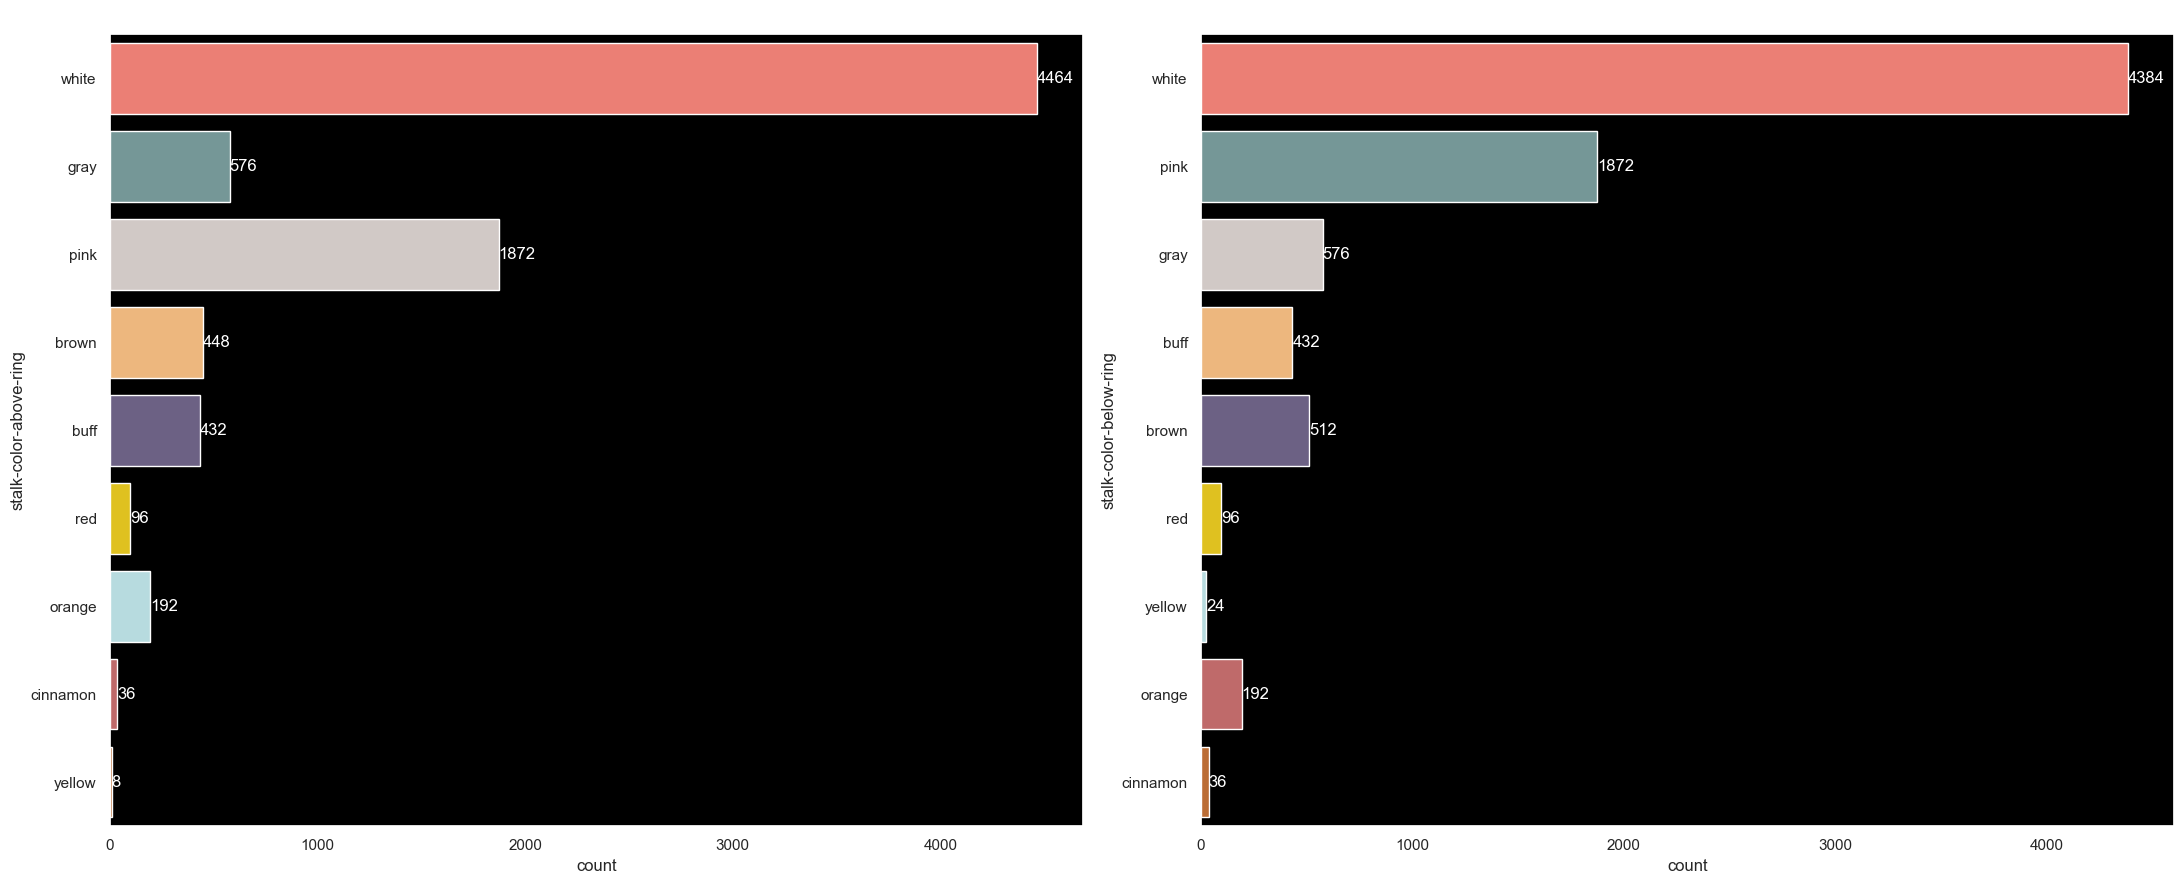

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a dark style for the plots


plt.figure(figsize=(22, 9))  # Set figure size

# Stalk Color Above Ring
ax1 = plt.subplot2grid((1, 2), (0, 0))

sns.countplot(y='stalk-color-above-ring', data=mushroom, ax=ax1, 
              palette=['#FF6F61','#6F9C9D','#D3C8C4','#FFB86C','#6A5B8A','#FFD700','#B0E0E6','#CD5C5C','#D2691E'])
for i in ax1.containers:
    ax1.bar_label(i, color='white')  # Set bar label color to white
ax1.set_facecolor('black')  # Set background to black
plt.title("Mushroom Stalk Color Above Ring", fontsize=16, fontweight='bold', color='white')

# Stalk Color Below Ring
ax2 = plt.subplot2grid((1, 2), (0, 1))

sns.countplot(y='stalk-color-below-ring', data=mushroom, ax=ax2, 
              palette=['#FF6F61','#6F9C9D','#D3C8C4','#FFB86C','#6A5B8A','#FFD700','#B0E0E6','#CD5C5C','#D2691E'])
for i in ax2.containers:
    ax2.bar_label(i, color='white')  # Set bar label color to white
ax2.set_facecolor('black')  # Set background to black
plt.title("Mushroom Stalk Color Below Ring", fontsize=16, fontweight='bold', color='white')

# Improve layout and show the plot
plt.tight_layout()
plt.show()


##### veil-color, ring-number, ring-type

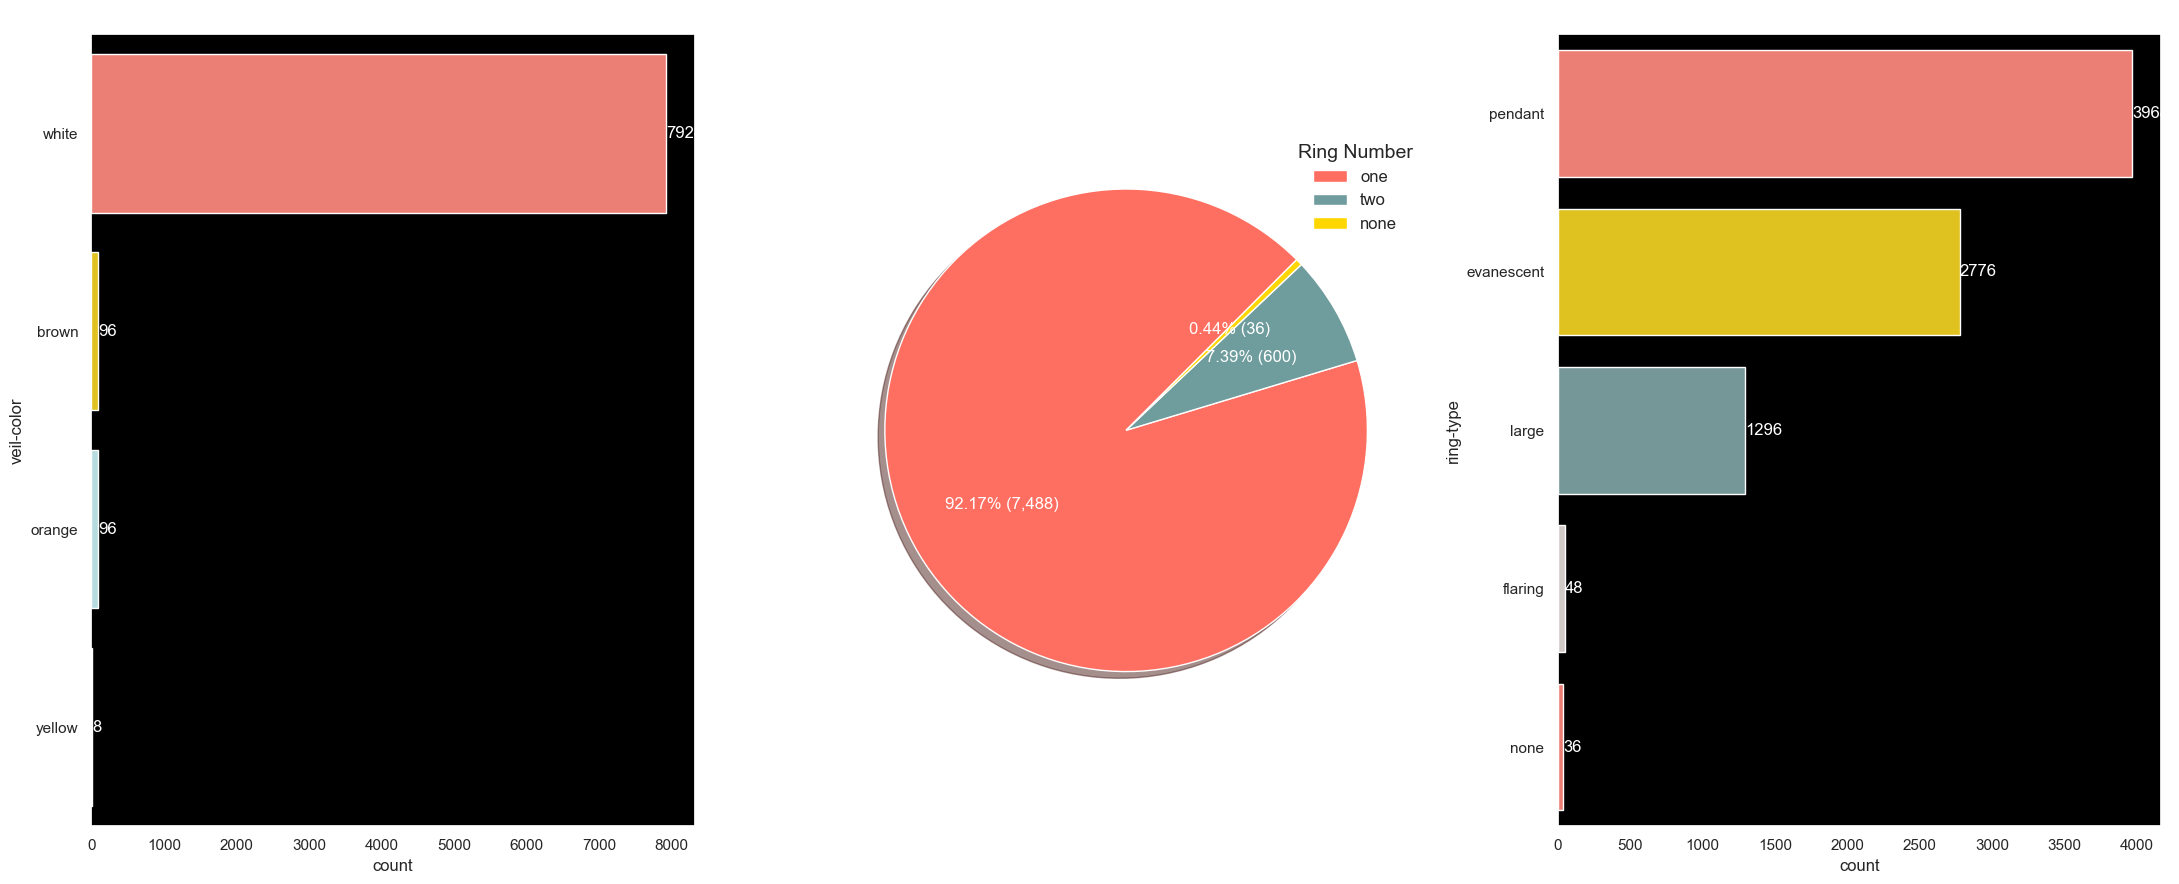

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a dark style for the plots

plt.figure(figsize=(22, 9))  # Set figure size

# Veil Color
ax1 = plt.subplot2grid((1, 3), (0, 0))

sns.countplot(y='veil-color', data=mushroom, ax=ax1, 
              palette=['#FF6F61','#FFD700','#B0E0E6','#D2691E'])  # Updated palette
for i in ax1.containers:
    ax1.bar_label(i, color='white')  # Set bar label color to white
ax1.set_facecolor('black')  # Set background to black
plt.title("Mushroom Veil Color", fontsize=16, fontweight='bold', color='white')

# Ring Number
ax2 = plt.subplot2grid((1, 3), (0, 1))

dataRingNumber = mushroom['ring-number'].value_counts().values
labelRingNumber = mushroom['ring-number'].value_counts().index

plt.pie(x=dataRingNumber, labels=labelRingNumber,
        autopct=lambda p: '{:.2f}% ({:,.0f})'.format(p, p * sum(dataRingNumber) / 100),
        shadow=True, startangle=45,
        colors=['#FF6F61','#6F9C9D','#FFD700','#D3C8C4'],  # Updated colors
        textprops={'color': 'white'})  # Change text color to white
plt.legend(labelRingNumber, loc='best', title='Ring Number', facecolor='black', fontsize=12, title_fontsize='14', frameon=False)
plt.title("Mushroom Ring Number", fontsize=16, fontweight='bold', color='white')

# Ring Type
ax3 = plt.subplot2grid((1, 3), (0, 2))

sns.countplot(y='ring-type', data=mushroom, ax=ax3, 
              palette=['#FF6F61','#FFD700','#6F9C9D','#D3C8C4'])  # Updated palette
for i in ax3.containers:
    ax3.bar_label(i, color='white')  # Set bar label color to white
ax3.set_facecolor('black')  # Set background to black
plt.title("Mushroom Ring Type", fontsize=16, fontweight='bold', color='white')

# Improve layout and show the plot
plt.tight_layout()
plt.show()


##### spore-print-color, population, habitat

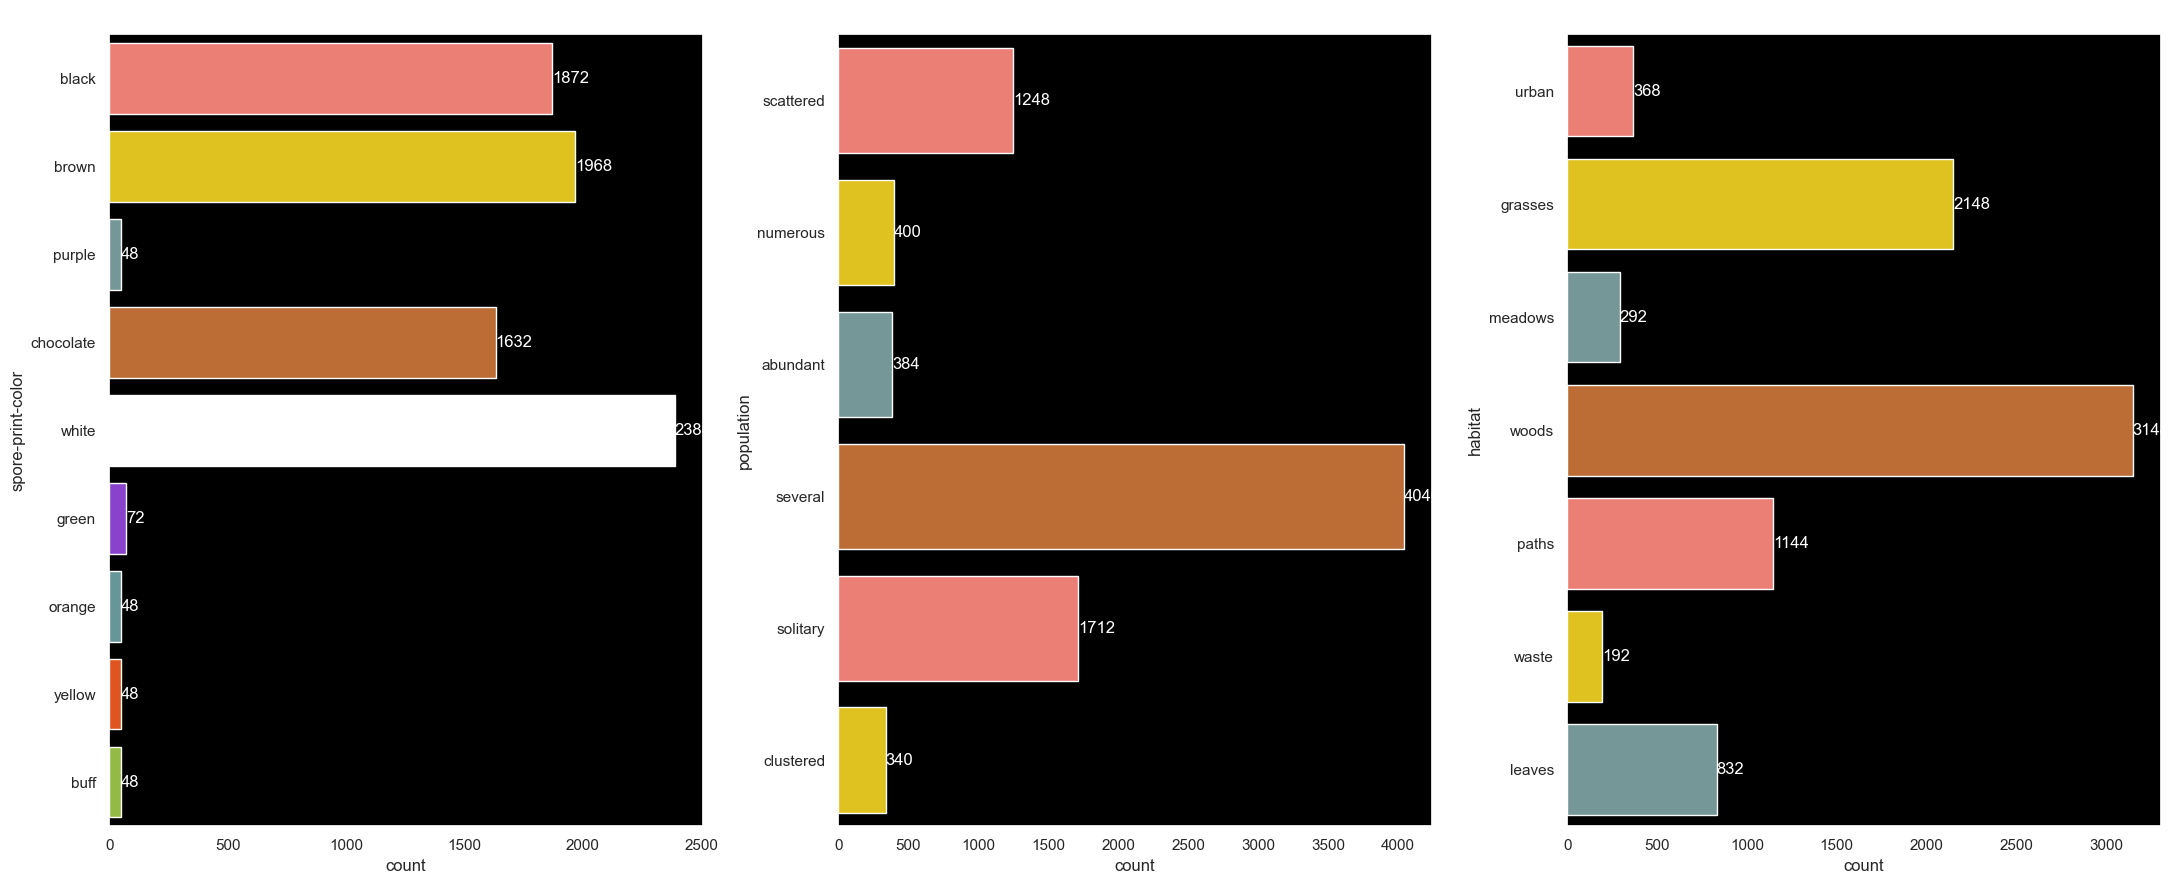

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a dark style for the plots

plt.figure(figsize=(22, 9))  # Set figure size

# Spore Print Color
ax1 = plt.subplot2grid((1, 3), (0, 0))

sns.countplot(y='spore-print-color', data=mushroom, ax=ax1, 
              palette=['#FF6F61', '#FFD700', '#6F9C9D', '#D2691E', '#FFFFFF', 
                        '#8A2BE2', '#5F9EA0', '#FF4500', '#9ACD32'])  # Updated colors
for i in ax1.containers:
    ax1.bar_label(i, color='white')  # Set bar label color to white
ax1.set_facecolor('black')  # Set background to black
plt.title("Mushroom Spore Print Color", fontsize=16, fontweight='bold', color='white')

# Population
ax2 = plt.subplot2grid((1, 3), (0, 1))

sns.countplot(y='population', data=mushroom, ax=ax2, 
              palette=['#FF6F61', '#FFD700', '#6F9C9D', '#D2691E'])  # Updated colors
for i in ax2.containers:
    ax2.bar_label(i, color='white')  # Set bar label color to white
ax2.set_facecolor('black')  # Set background to black
plt.title("Mushroom Population", fontsize=16, fontweight='bold', color='white')

# Habitat
ax3 = plt.subplot2grid((1, 3), (0, 2))

sns.countplot(y='habitat', data=mushroom, ax=ax3, 
              palette=['#FF6F61', '#FFD700', '#6F9C9D', '#D2691E'])  # Updated colors
for i in ax3.containers:
    ax3.bar_label(i, color='white')  # Set bar label color to white
ax3.set_facecolor('black')  # Set background to black
plt.title("Mushroom Habitat", fontsize=16, fontweight='bold', color='white')

# Improve layout and show the plot
plt.tight_layout()
plt.show()


#### Bivariate Analysis:

In [28]:
# cap-shape vs class
CapShapeClass = mushroom.groupby(['class','cap-shape']).size().reset_index().pivot(
    columns='class',index='cap-shape',values=0).rename(columns={0:"counts"})
CapShapeClass

class,edible,poisonous
cap-shape,,
bell,404.0,48.0
conical,NaN,4.0
convex,1948.0,1708.0
flat,1596.0,1556.0
knobbed,228.0,600.0
sunken,32.0,NaN


In [29]:
# bruises vs class
BruisesClass = mushroom.groupby(['class','bruises']).size().reset_index().pivot(
    columns='class',index='bruises',values=0).rename(columns={0:"counts"})
BruisesClass

class,edible,poisonous
bruises,,
no,1456,3292
yes,2752,624


In [30]:
# odor vs class
OdorClass = mushroom.groupby(['class','odor']).size().reset_index().pivot(
    columns='class',index='odor',values=0).rename(columns={0:"counts"})
OdorClass

class,edible,poisonous
odor,,
almond,400.0,NaN
anise,400.0,NaN
creosote,NaN,192.0
fishy,NaN,576.0
foul,NaN,2160.0
musty,NaN,36.0
none,3408.0,120.0
pungent,NaN,256.0
spicy,NaN,576.0


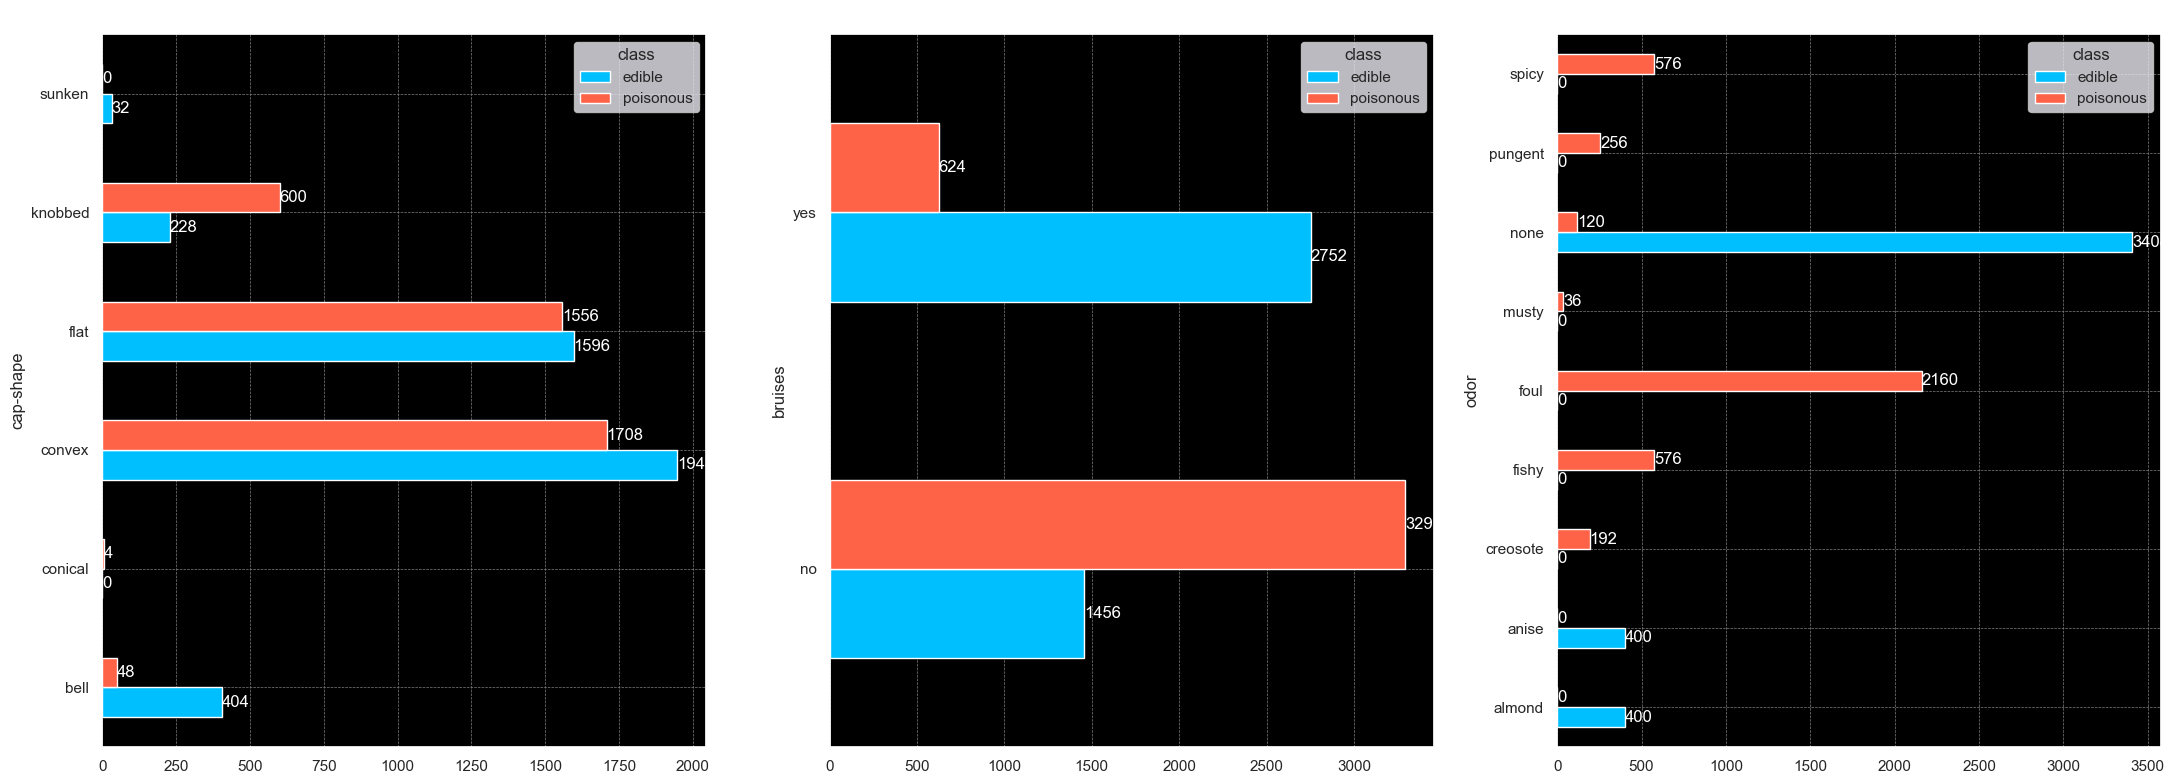

In [31]:
import matplotlib.pyplot as plt

# Set a dark style for the plots

plt.figure(figsize=(22, 8))  # Set figure size

# Define a color palette
colors = ['#00BFFF', '#FF6347']  # Bright blue and tomato red

# Cap Shape vs Class
ax1 = plt.subplot2grid((1, 3), (0, 0))
CapShapeClass.plot(kind='barh', stacked=False, ax=ax1, color=colors)
for i in ax1.containers:
    ax1.bar_label(i, color='white')  # Set bar label color to white
plt.title("Cap Shape vs Class", fontsize=16, fontweight='bold', color='white')
ax1.set_facecolor('black')  # Set background to black
ax1.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Bruises vs Class
ax2 = plt.subplot2grid((1, 3), (0, 1))
BruisesClass.plot(kind='barh', stacked=False, ax=ax2, color=colors)
for i in ax2.containers:
    ax2.bar_label(i, color='white')  # Set bar label color to white
plt.title("Bruises vs Class", fontsize=16, fontweight='bold', color='white')
ax2.set_facecolor('black')  # Set background to black
ax2.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Odor vs Class
ax3 = plt.subplot2grid((1, 3), (0, 2))
OdorClass.plot(kind='barh', stacked=False, ax=ax3, color=colors)
for i in ax3.containers:
    ax3.bar_label(i, color='white')  # Set bar label color to white
plt.title("Odor vs Class", fontsize=16, fontweight='bold', color='white')
ax3.set_facecolor('black')  # Set background to black
ax3.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Improve layout and show the plot
plt.tight_layout()
plt.show()


In [32]:
# cap-surface vs class
CapSurfaceClass = mushroom.groupby(['class','cap-surface']).size().reset_index().pivot(
    columns='class',index='cap-surface',values=0).rename(columns={0:"counts"})
CapSurfaceClass

class,edible,poisonous
cap-surface,,
fibrous,1560.0,760.0
grooves,NaN,4.0
scaly,1504.0,1740.0
smooth,1144.0,1412.0


In [33]:
# cap-color vs class
CapColorClass = mushroom.groupby(['class','cap-color']).size().reset_index().pivot(
    columns='class',index='cap-color',values=0).rename(columns={0:"counts"})
CapColorClass

class,edible,poisonous
cap-color,,
brown,1264.0,1020.0
buff,48.0,120.0
cinnamon,32.0,12.0
gray,1032.0,808.0
green,16.0,NaN
pink,56.0,88.0
purple,16.0,NaN
red,624.0,876.0
white,720.0,320.0


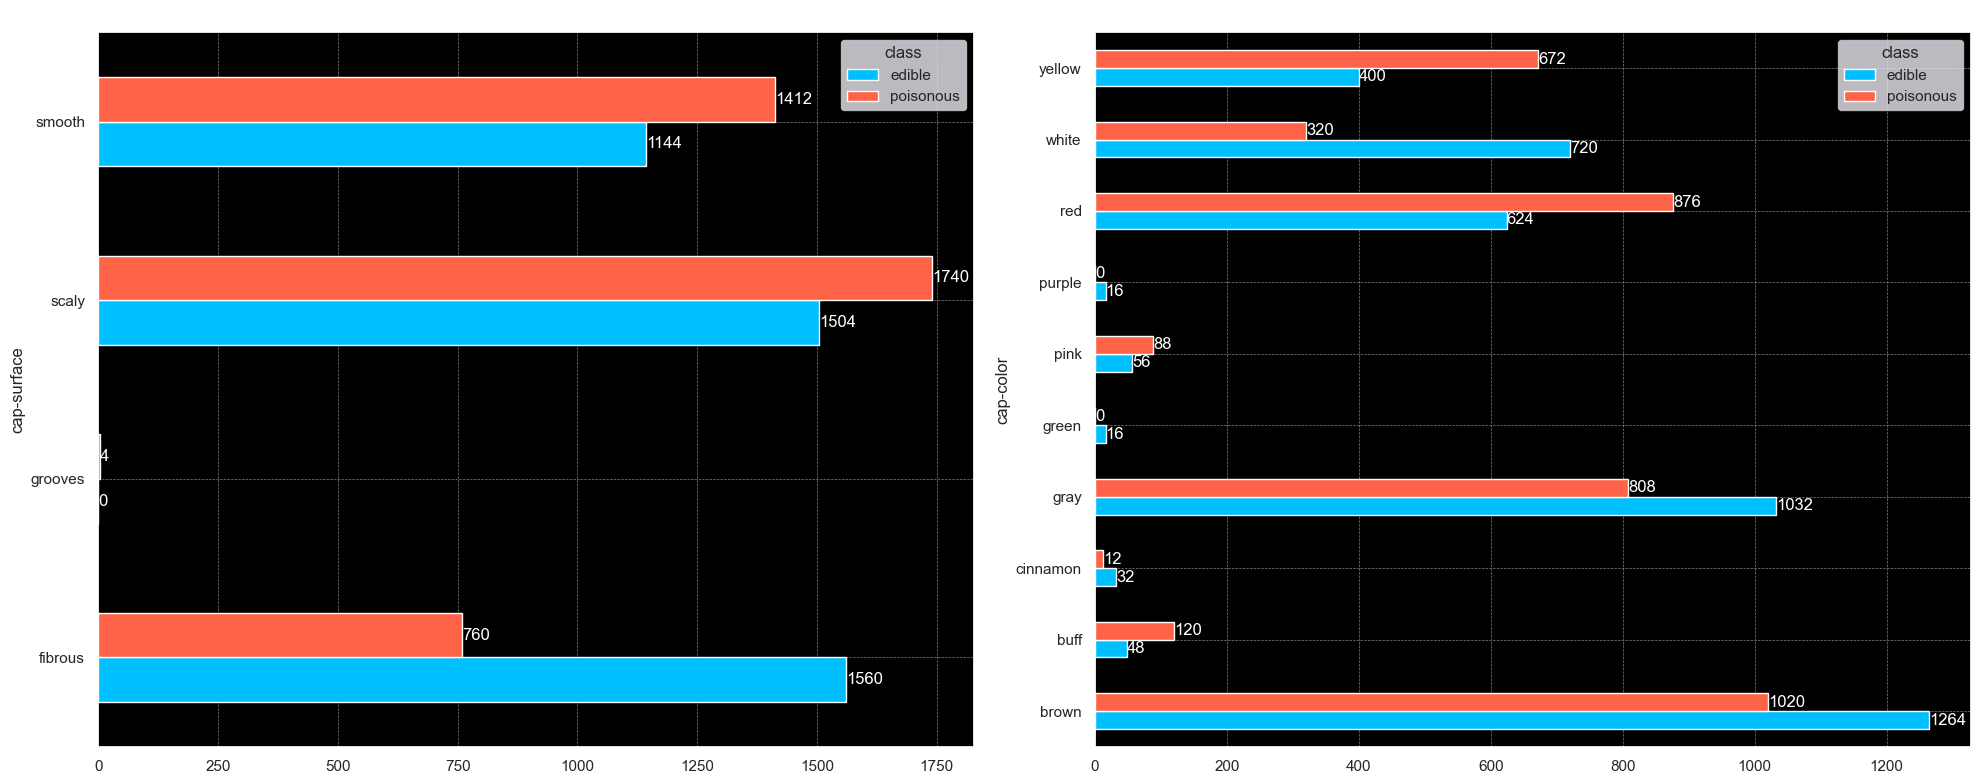

In [34]:
import matplotlib.pyplot as plt

# Set a dark style for the plots
plt.figure(figsize=(20, 8))  # Set figure size

# Define a color palette
colors = ['#00BFFF', '#FF6347']  # Bright blue and tomato red

# Cap Surface vs Class
ax1 = plt.subplot2grid((1, 2), (0, 0))
CapSurfaceClass.plot(kind='barh', stacked=False, ax=ax1, color=colors)
for i in ax1.containers:
    ax1.bar_label(i, color='white')  # Set bar label color to white
plt.title("Cap Surface vs Class", fontsize=14, fontweight='bold', color='white')
ax1.set_facecolor('black')  # Set background to black
ax1.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Cap Color vs Class
ax2 = plt.subplot2grid((1, 2), (0, 1))
CapColorClass.plot(kind='barh', stacked=False, ax=ax2, color=colors)
for i in ax2.containers:
    ax2.bar_label(i, color='white')  # Set bar label color to white
plt.title("Cap Color vs Class", fontsize=14, fontweight='bold', color='white')
ax2.set_facecolor('black')  # Set background to black
ax2.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Improve layout and show the plot
plt.tight_layout()
plt.show()


In [35]:
# gill-attachment vs class
GillAttachmentClass = mushroom.groupby(['class','gill-attachment']).size().reset_index().pivot(
    columns='class',index='gill-attachment',values=0).rename(columns={0:"counts"})
GillAttachmentClass

class,edible,poisonous
gill-attachment,,
attached,192,18
free,4016,3898


In [36]:
# gill-spacing vs class
GillSpacingClass = mushroom.groupby(['class','gill-spacing']).size().reset_index().pivot(
    columns='class',index='gill-spacing',values=0).rename(columns={0:"counts"})
GillSpacingClass

class,edible,poisonous
gill-spacing,,
close,3008,3804
crowded,1200,112


In [37]:
# gill-size vs class
GillSizeClass = mushroom.groupby(['class','gill-size']).size().reset_index().pivot(
    columns='class',index='gill-size',values=0).rename(columns={0:"counts"})
GillSizeClass

class,edible,poisonous
gill-size,,
broad,3920,1692
narrow,288,2224


In [38]:
# gill-color vs class
GillColorClass = mushroom.groupby(['class','gill-color']).size().reset_index().pivot(
    columns='class',index='gill-color',values=0).rename(columns={0:"counts"})
GillColorClass

class,edible,poisonous
gill-color,,
black,344.0,64.0
brown,936.0,112.0
buff,NaN,1728.0
chocolate,204.0,528.0
gray,248.0,504.0
green,NaN,24.0
orange,64.0,NaN
pink,852.0,640.0
purple,444.0,48.0


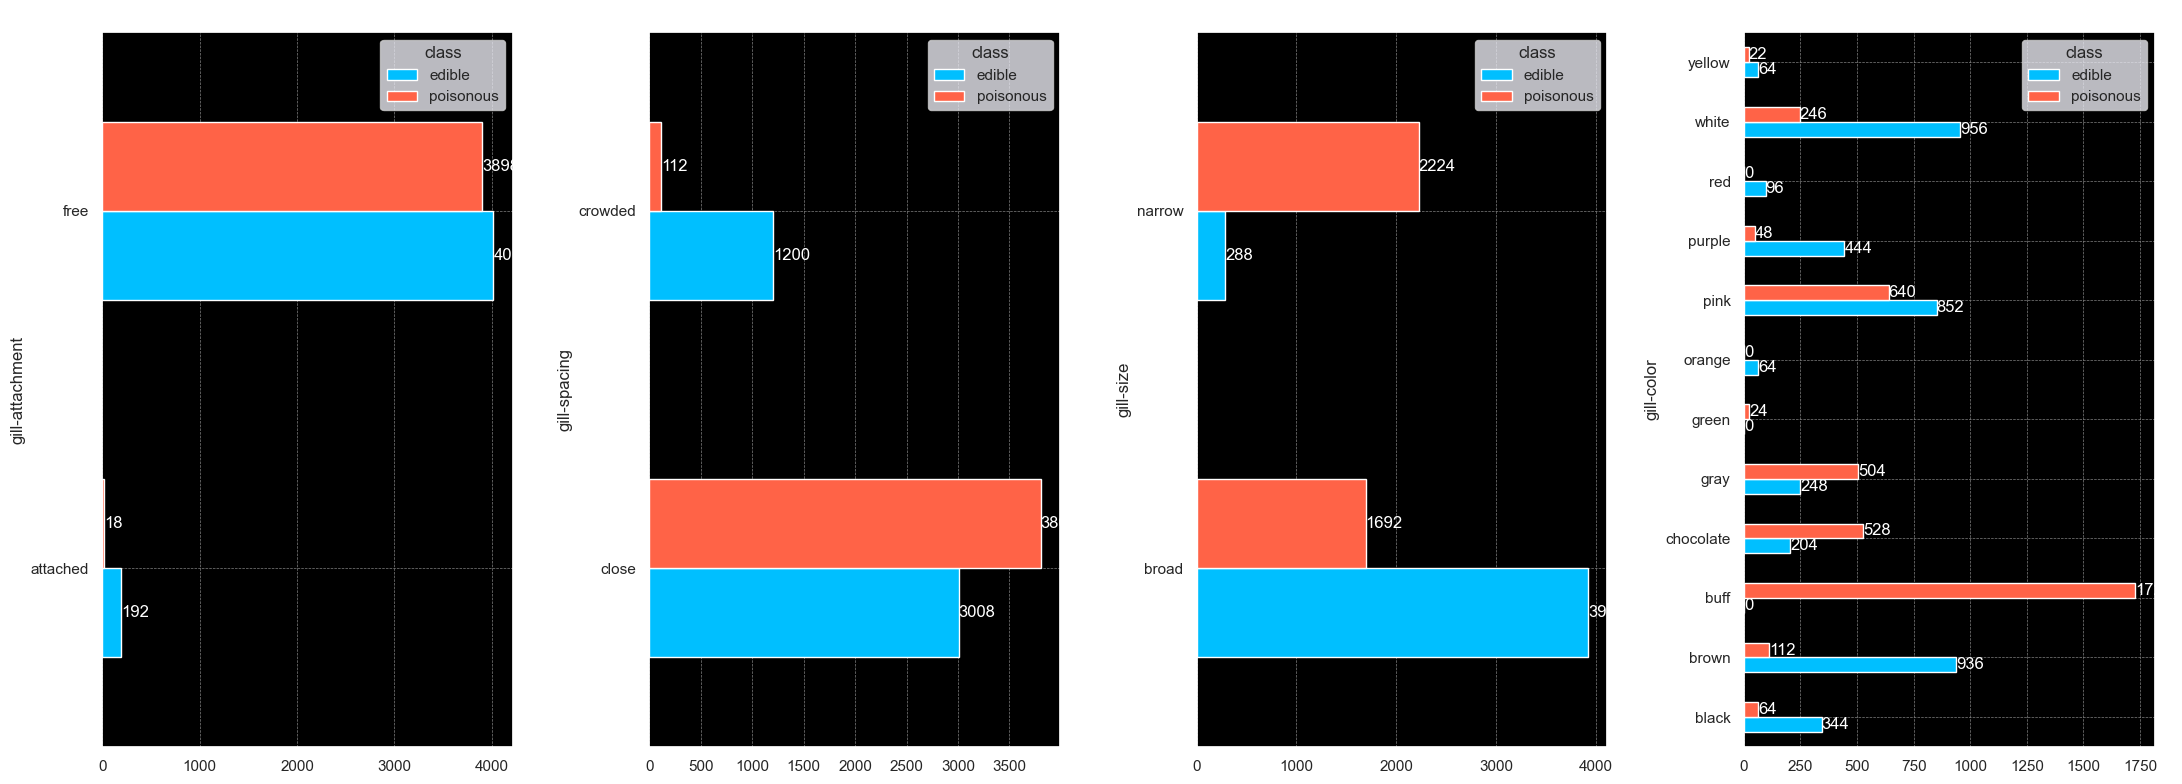

In [39]:
import matplotlib.pyplot as plt

# Set a dark style for the plots

plt.figure(figsize=(22, 8))  # Set figure size

# Define a color palette
colors = ['#00BFFF', '#FF6347']  # Bright blue and tomato red

# Gill Attachment vs Class
ax1 = plt.subplot2grid((1, 4), (0, 0))
GillAttachmentClass.plot(kind='barh', stacked=False, ax=ax1, color=colors)
for i in ax1.containers:
    ax1.bar_label(i, color='white')  # Set bar label color to white
plt.title("Gill Attachment vs Class", fontsize=14, fontweight='bold', color='white')
ax1.set_facecolor('black')  # Set background to black
ax1.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Gill Spacing vs Class
ax2 = plt.subplot2grid((1, 4), (0, 1))
GillSpacingClass.plot(kind='barh', stacked=False, ax=ax2, color=colors)
for i in ax2.containers:
    ax2.bar_label(i, color='white')  # Set bar label color to white
plt.title("Gill Spacing vs Class", fontsize=14, fontweight='bold', color='white')
ax2.set_facecolor('black')  # Set background to black
ax2.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Gill Size vs Class
ax3 = plt.subplot2grid((1, 4), (0, 2))
GillSizeClass.plot(kind='barh', stacked=False, ax=ax3, color=colors)
for i in ax3.containers:
    ax3.bar_label(i, color='white')  # Set bar label color to white
plt.title("Gill Size vs Class", fontsize=14, fontweight='bold', color='white')
ax3.set_facecolor('black')  # Set background to black
ax3.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Gill Color vs Class
ax4 = plt.subplot2grid((1, 4), (0, 3))
GillColorClass.plot(kind='barh', stacked=False, ax=ax4, color=colors)
for i in ax4.containers:
    ax4.bar_label(i, color='white')  # Set bar label color to white
plt.title("Gill Color vs Class", fontsize=14, fontweight='bold', color='white')
ax4.set_facecolor('black')  # Set background to black
ax4.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Improve layout and show the plot
plt.tight_layout()
plt.show()


In [40]:
# stalk-shape vs class
StalkShapeClass = mushroom.groupby(['class','stalk-shape']).size().reset_index().pivot(
    columns='class',index='stalk-shape',values=0).rename(columns={0:"counts"})
StalkShapeClass

class,edible,poisonous
stalk-shape,,
enlarging,1616,1900
tapering,2592,2016


In [41]:
# stalk-root vs class
StalkRootClass = mushroom.groupby(['class','stalk-root']).size().reset_index().pivot(
    columns='class',index='stalk-root',values=0).rename(columns={0:"counts"})
StalkRootClass

class,edible,poisonous
stalk-root,,
bulbous,1920.0,1856.0
club,512.0,44.0
equal,864.0,256.0
rooted,192.0,NaN


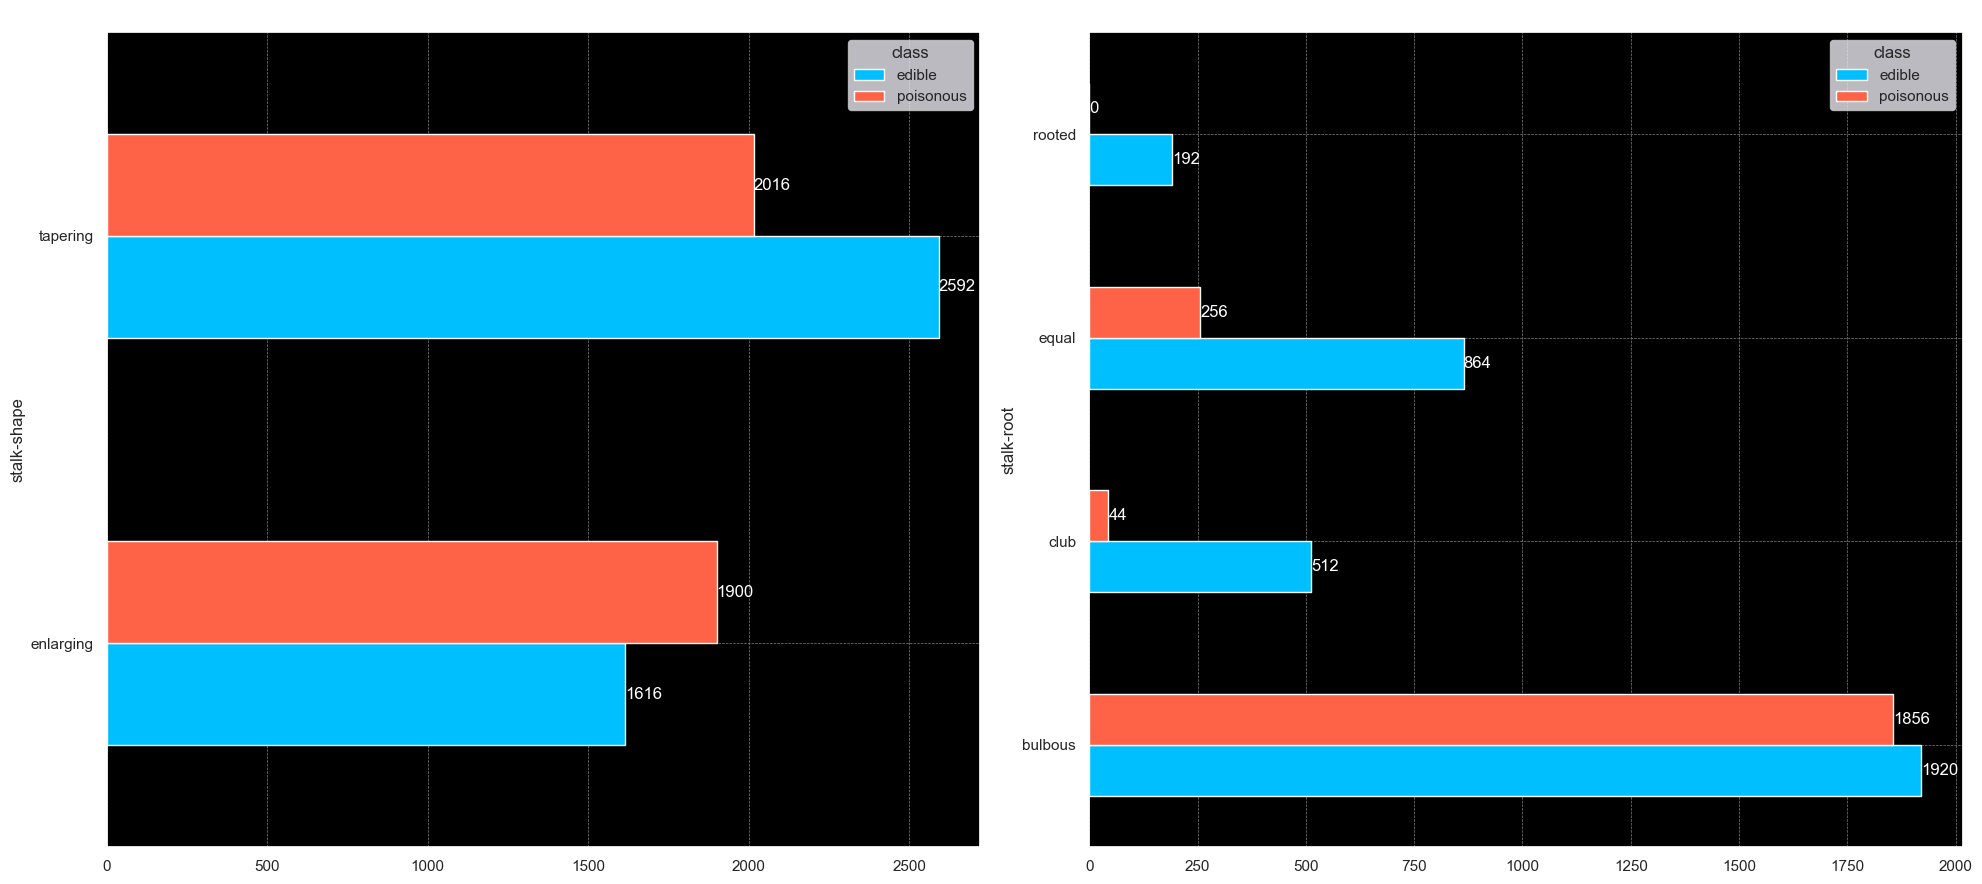

In [42]:
import matplotlib.pyplot as plt

# Set a dark style for the plots

plt.figure(figsize=(20, 9))  # Set figure size

# Define a color palette
colors = ['#00BFFF', '#FF6347']  # Bright blue and tomato red

# Stalk Shape vs Class
ax1 = plt.subplot2grid((1, 2), (0, 0))
StalkShapeClass.plot(kind='barh', stacked=False, ax=ax1, color=colors)
for i in ax1.containers:
    ax1.bar_label(i, color='white')  # Set bar label color to white
plt.title("Stalk Shape vs Class", fontsize=14, fontweight='bold', color='white')
ax1.set_facecolor('black')  # Set background to black
ax1.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Stalk Root vs Class
ax2 = plt.subplot2grid((1, 2), (0, 1))
StalkRootClass.plot(kind='barh', stacked=False, ax=ax2, color=colors)
for i in ax2.containers:
    ax2.bar_label(i, color='white')  # Set bar label color to white
plt.title("Stalk Root vs Class", fontsize=14, fontweight='bold', color='white')
ax2.set_facecolor('black')  # Set background to black
ax2.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Improve layout and show the plot
plt.tight_layout()
plt.show()


In [43]:
# stalk-surface-above-ring vs class
StalkSurfaceAboveRingClass = mushroom.groupby(['class','stalk-surface-above-ring']).size().reset_index().pivot(
    columns='class',index='stalk-surface-above-ring',values=0).rename(columns={0:"counts"})
StalkSurfaceAboveRingClass

class,edible,poisonous
stalk-surface-above-ring,,
fibrous,408,144
scaly,16,8
silky,144,2228
smooth,3640,1536


In [44]:
# stalk-surface-below-ring vs class
StalkSurfaceBelowRingClass = mushroom.groupby(['class','stalk-surface-below-ring']).size().reset_index().pivot(
    columns='class',index='stalk-surface-below-ring',values=0).rename(columns={0:"counts"})
StalkSurfaceBelowRingClass

class,edible,poisonous
stalk-surface-below-ring,,
fibrous,456,144
scaly,208,76
silky,144,2160
smooth,3400,1536


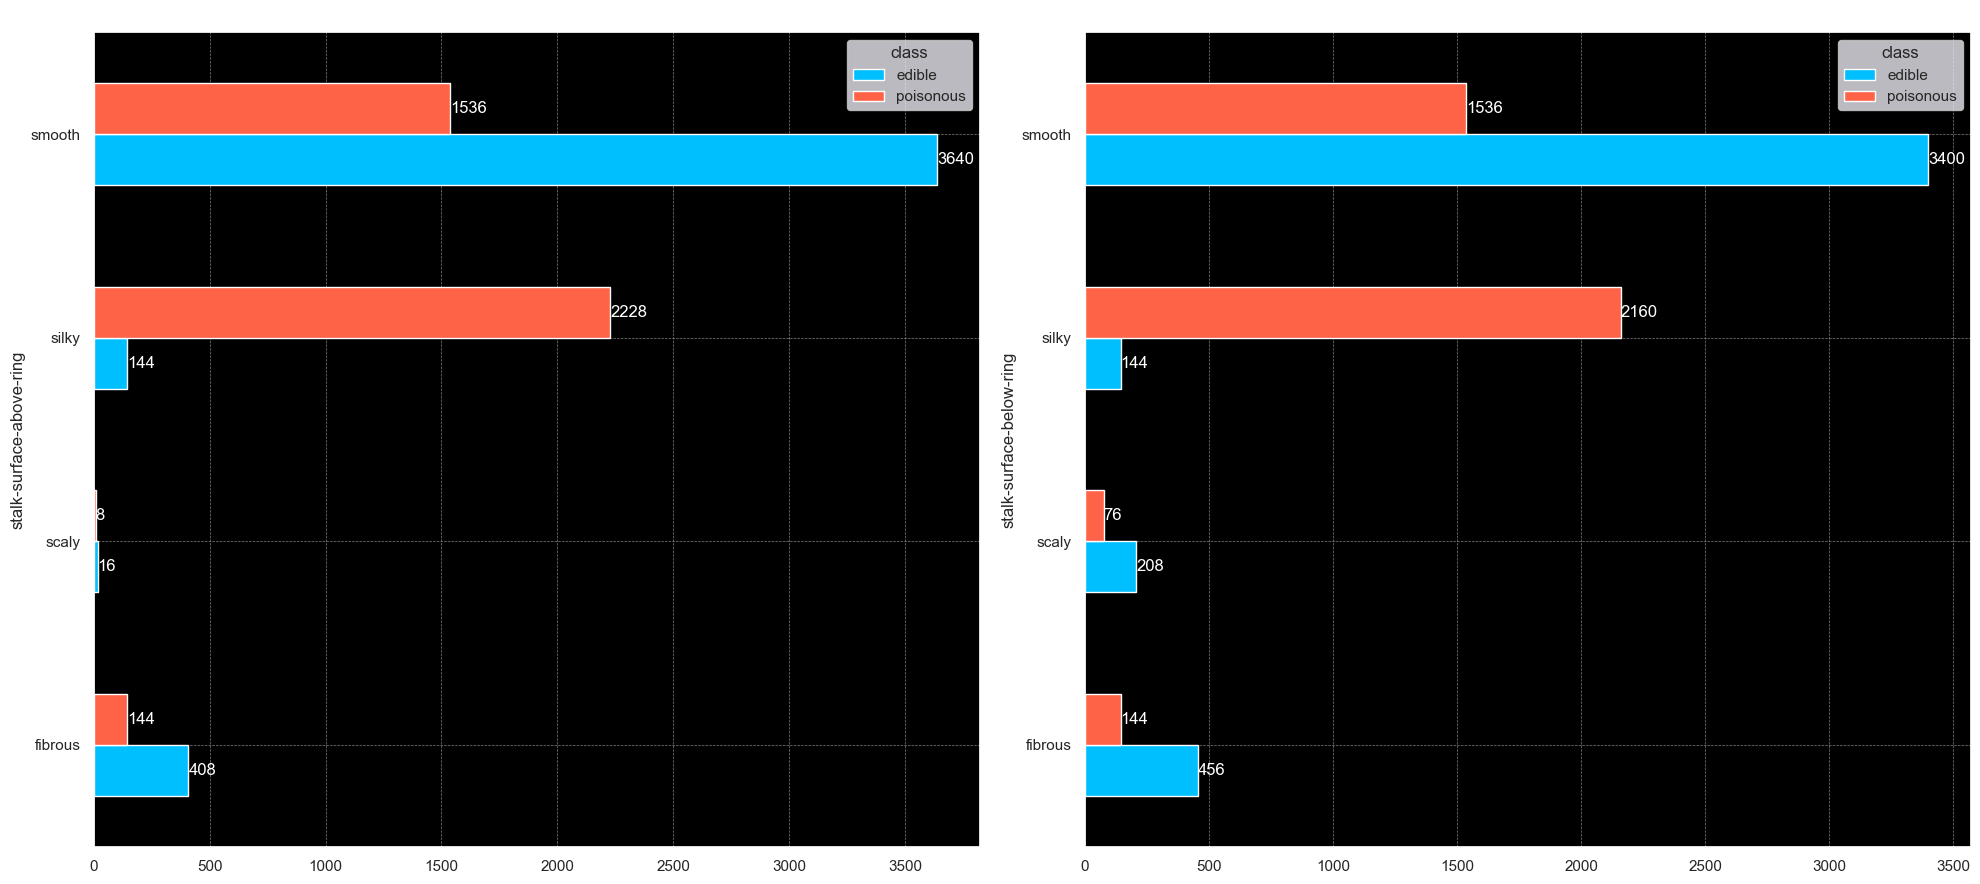

In [45]:
import matplotlib.pyplot as plt

# Set a dark style for the plots

plt.figure(figsize=(20, 9))  # Set figure size

# Define a color palette
colors = ['#00BFFF', '#FF6347']  # Bright blue and tomato red

# Stalk Surface Above Ring vs Class
ax1 = plt.subplot2grid((1, 2), (0, 0))
StalkSurfaceAboveRingClass.plot(kind='barh', stacked=False, ax=ax1, color=colors)
for i in ax1.containers:
    ax1.bar_label(i, color='white')  # Set bar label color to white
plt.title("Stalk Surface Above Ring vs Class", fontsize=14, fontweight='bold', color='white')
ax1.set_facecolor('black')  # Set background to black
ax1.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Stalk Surface Below Ring vs Class
ax2 = plt.subplot2grid((1, 2), (0, 1))
StalkSurfaceBelowRingClass.plot(kind='barh', stacked=False, ax=ax2, color=colors)
for i in ax2.containers:
    ax2.bar_label(i, color='white')  # Set bar label color to white
plt.title("Stalk Surface Below Ring vs Class", fontsize=14, fontweight='bold', color='white')
ax2.set_facecolor('black')  # Set background to black
ax2.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Improve layout and show the plot
plt.tight_layout()
plt.show()


In [46]:
# stalk-color-above-ring vs class
StalkColorAboveRingClass = mushroom.groupby(['class','stalk-color-above-ring']).size().reset_index().pivot(
    columns='class',index='stalk-color-above-ring',values=0).rename(columns={0:"counts"})
StalkColorAboveRingClass

class,edible,poisonous
stalk-color-above-ring,,
brown,16.0,432.0
buff,NaN,432.0
cinnamon,NaN,36.0
gray,576.0,NaN
orange,192.0,NaN
pink,576.0,1296.0
red,96.0,NaN
white,2752.0,1712.0
yellow,NaN,8.0


In [47]:
# stalk-color-below-ring vs class
StalkColorBelowRingClass = mushroom.groupby(['class','stalk-color-below-ring']).size().reset_index().pivot(
    columns='class',index='stalk-color-below-ring',values=0).rename(columns={0:"counts"})
StalkColorBelowRingClass

class,edible,poisonous
stalk-color-below-ring,,
brown,64.0,448.0
buff,NaN,432.0
cinnamon,NaN,36.0
gray,576.0,NaN
orange,192.0,NaN
pink,576.0,1296.0
red,96.0,NaN
white,2704.0,1680.0
yellow,NaN,24.0


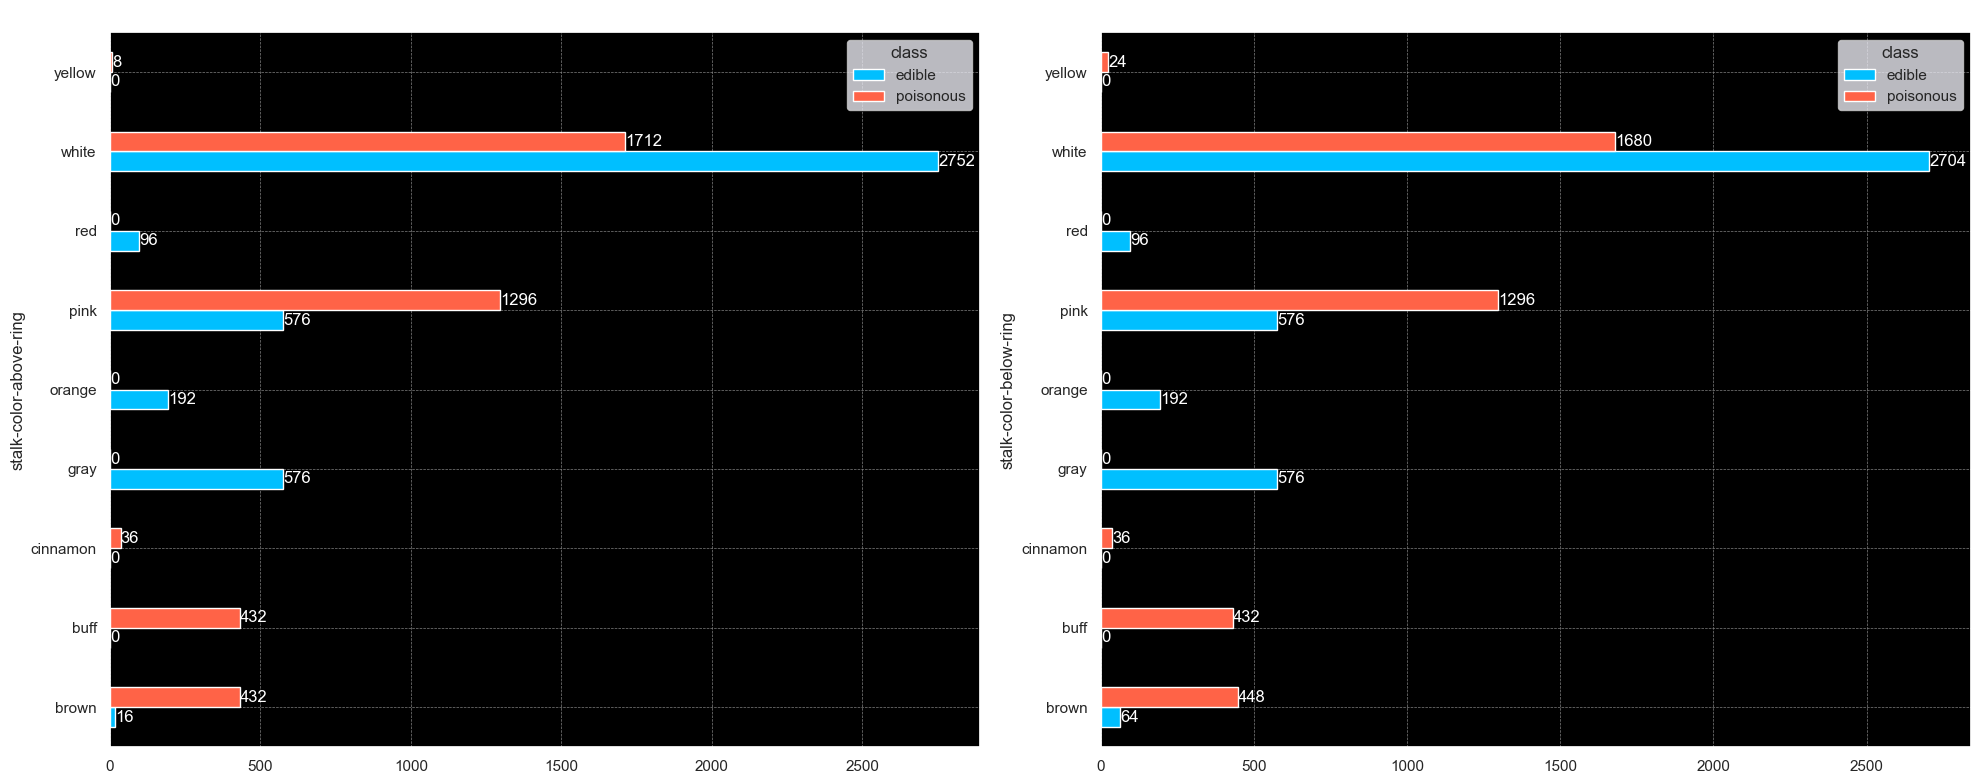

In [48]:
import matplotlib.pyplot as plt

# Set a dark style for the plots

plt.figure(figsize=(20, 8))  # Set figure size

# Define a color palette
colors = ['#00BFFF', '#FF6347']  # Bright blue and tomato red

# Stalk Color Above Ring vs Class
ax1 = plt.subplot2grid((1, 2), (0, 0))
StalkColorAboveRingClass.plot(kind='barh', stacked=False, ax=ax1, color=colors)
for i in ax1.containers:
    ax1.bar_label(i, color='white')  # Set bar label color to white
plt.title("Stalk Color Above Ring vs Class", fontsize=14, fontweight='bold', color='white')
ax1.set_facecolor('black')  # Set background to black
ax1.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Stalk Color Below Ring vs Class
ax2 = plt.subplot2grid((1, 2), (0, 1))
StalkColorBelowRingClass.plot(kind='barh', stacked=False, ax=ax2, color=colors)
for i in ax2.containers:
    ax2.bar_label(i, color='white')  # Set bar label color to white
plt.title("Stalk Color Below Ring vs Class", fontsize=14, fontweight='bold', color='white')
ax2.set_facecolor('black')  # Set background to black
ax2.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Improve layout and show the plot
plt.tight_layout()
plt.show()


In [49]:
# veil-color vs class
VeilColorClass = mushroom.groupby(['class','veil-color']).size().reset_index().pivot(
    columns='class',index='veil-color',values=0).rename(columns={0:"counts"})
VeilColorClass

class,edible,poisonous
veil-color,,
brown,96.0,NaN
orange,96.0,NaN
white,4016.0,3908.0
yellow,NaN,8.0


In [50]:
# ring-number vs class
RingNumberClass = mushroom.groupby(['class','ring-number']).size().reset_index().pivot(
    columns='class',index='ring-number',values=0).rename(columns={0:"counts"})
RingNumberClass

class,edible,poisonous
ring-number,,
none,NaN,36.0
one,3680.0,3808.0
two,528.0,72.0


In [51]:
# ring-type vs class
RingTypeClass = mushroom.groupby(['class','ring-type']).size().reset_index().pivot(
    columns='class',index='ring-type',values=0).rename(columns={0:"counts"})
RingTypeClass

class,edible,poisonous
ring-type,,
evanescent,1008.0,1768.0
flaring,48.0,NaN
large,NaN,1296.0
none,NaN,36.0
pendant,3152.0,816.0


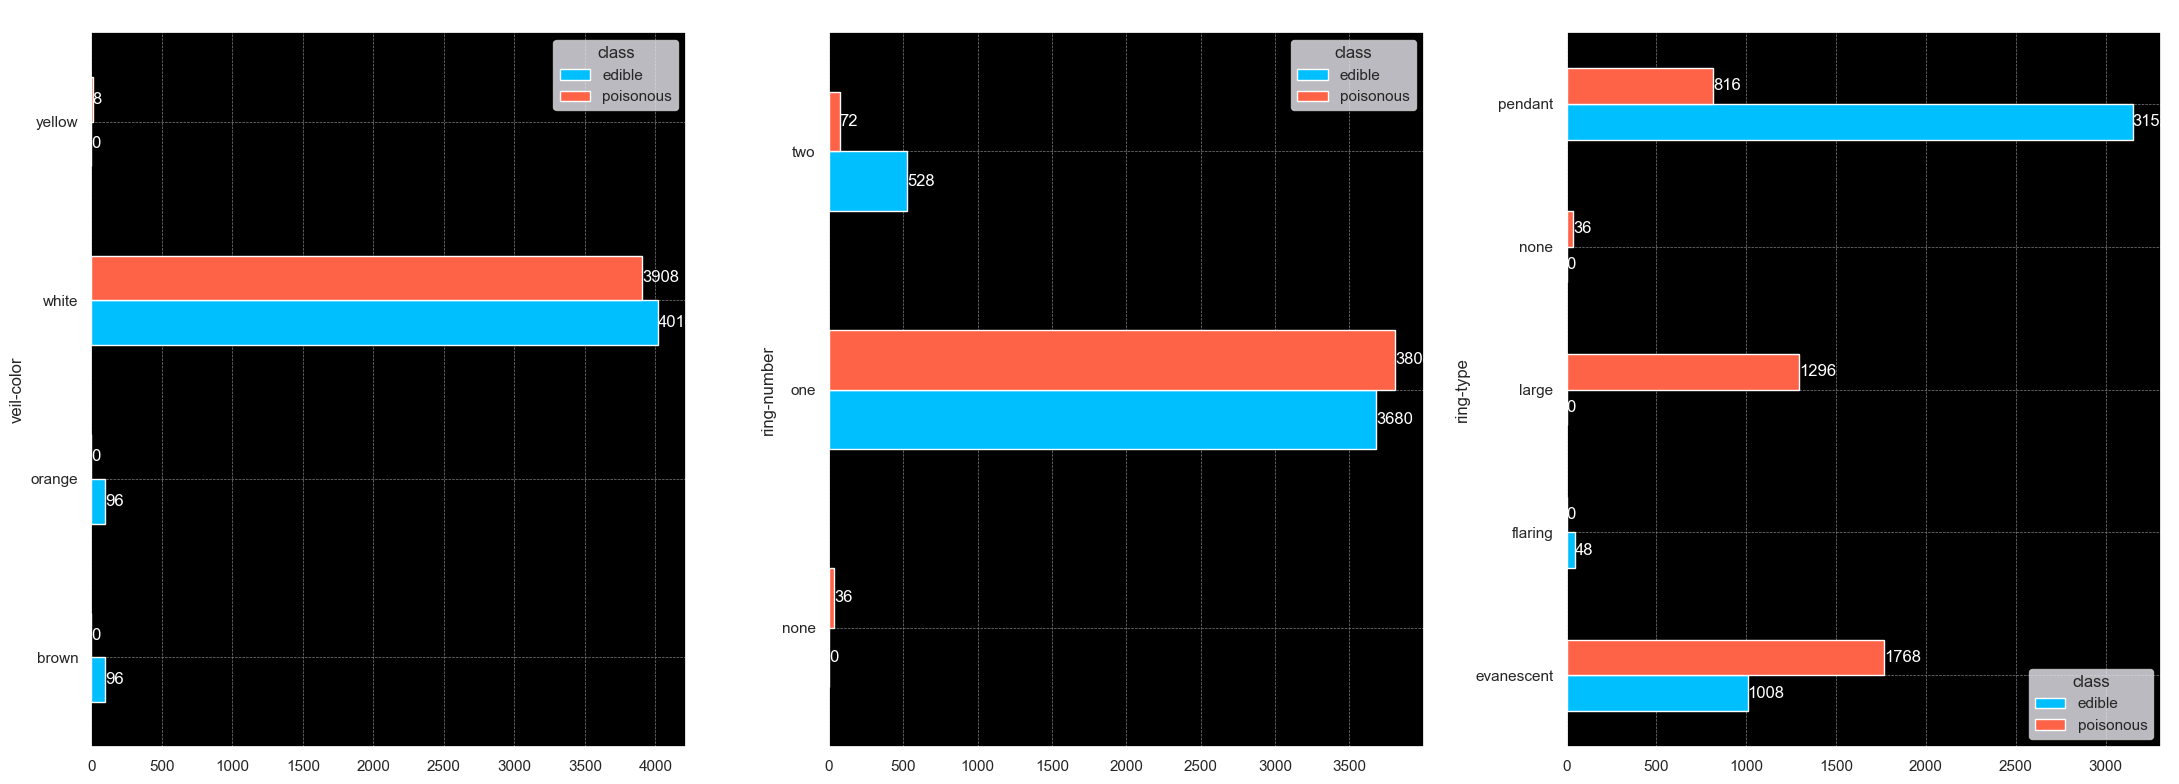

In [52]:
import matplotlib.pyplot as plt

# Set a dark style for the plots
plt.figure(figsize=(22, 8))  # Set figure size

# Define a color palette
colors = ['#00BFFF', '#FF6347']  # Bright blue and tomato red

# Veil Color vs Class
ax1 = plt.subplot2grid((1, 3), (0, 0))
VeilColorClass.plot(kind='barh', stacked=False, ax=ax1, color=colors)
for i in ax1.containers:
    ax1.bar_label(i, color='white')  # Set bar label color to white
plt.title("Veil Color vs Class", fontsize=14, fontweight='bold', color='white')
ax1.set_facecolor('black')  # Set background to black
ax1.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Ring Number vs Class
ax2 = plt.subplot2grid((1, 3), (0, 1))
RingNumberClass.plot(kind='barh', stacked=False, ax=ax2, color=colors)
for i in ax2.containers:
    ax2.bar_label(i, color='white')  # Set bar label color to white
plt.title("Ring Number vs Class", fontsize=14, fontweight='bold', color='white')
ax2.set_facecolor('black')  # Set background to black
ax2.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Ring Type vs Class
ax3 = plt.subplot2grid((1, 3), (0, 2))
RingTypeClass.plot(kind='barh', stacked=False, ax=ax3, color=colors)
for i in ax3.containers:
    ax3.bar_label(i, color='white')  # Set bar label color to white
plt.title("Ring Type vs Class", fontsize=14, fontweight='bold', color='white')
ax3.set_facecolor('black')  # Set background to black
ax3.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Improve layout and show the plot
plt.tight_layout()
plt.show()


In [53]:
# spore-print-color vs class
SporePrintColorClass = mushroom.groupby(['class','spore-print-color']).size().reset_index().pivot(
    columns='class',index='spore-print-color',values=0).rename(columns={0:"counts"})
SporePrintColorClass

class,edible,poisonous
spore-print-color,,
black,1648.0,224.0
brown,1744.0,224.0
buff,48.0,NaN
chocolate,48.0,1584.0
green,NaN,72.0
orange,48.0,NaN
purple,48.0,NaN
white,576.0,1812.0
yellow,48.0,NaN


In [54]:
# population vs class
PopulationClass = mushroom.groupby(['class','population']).size().reset_index().pivot(
    columns='class',index='population',values=0).rename(columns={0:"counts"})
PopulationClass

class,edible,poisonous
population,,
abundant,384.0,NaN
clustered,288.0,52.0
numerous,400.0,NaN
scattered,880.0,368.0
several,1192.0,2848.0
solitary,1064.0,648.0


In [55]:
# habitat vs class
HabitatClass = mushroom.groupby(['class','habitat']).size().reset_index().pivot(
    columns='class',index='habitat',values=0).rename(columns={0:"counts"})
HabitatClass

class,edible,poisonous
habitat,,
grasses,1408.0,740.0
leaves,240.0,592.0
meadows,256.0,36.0
paths,136.0,1008.0
urban,96.0,272.0
waste,192.0,NaN
woods,1880.0,1268.0


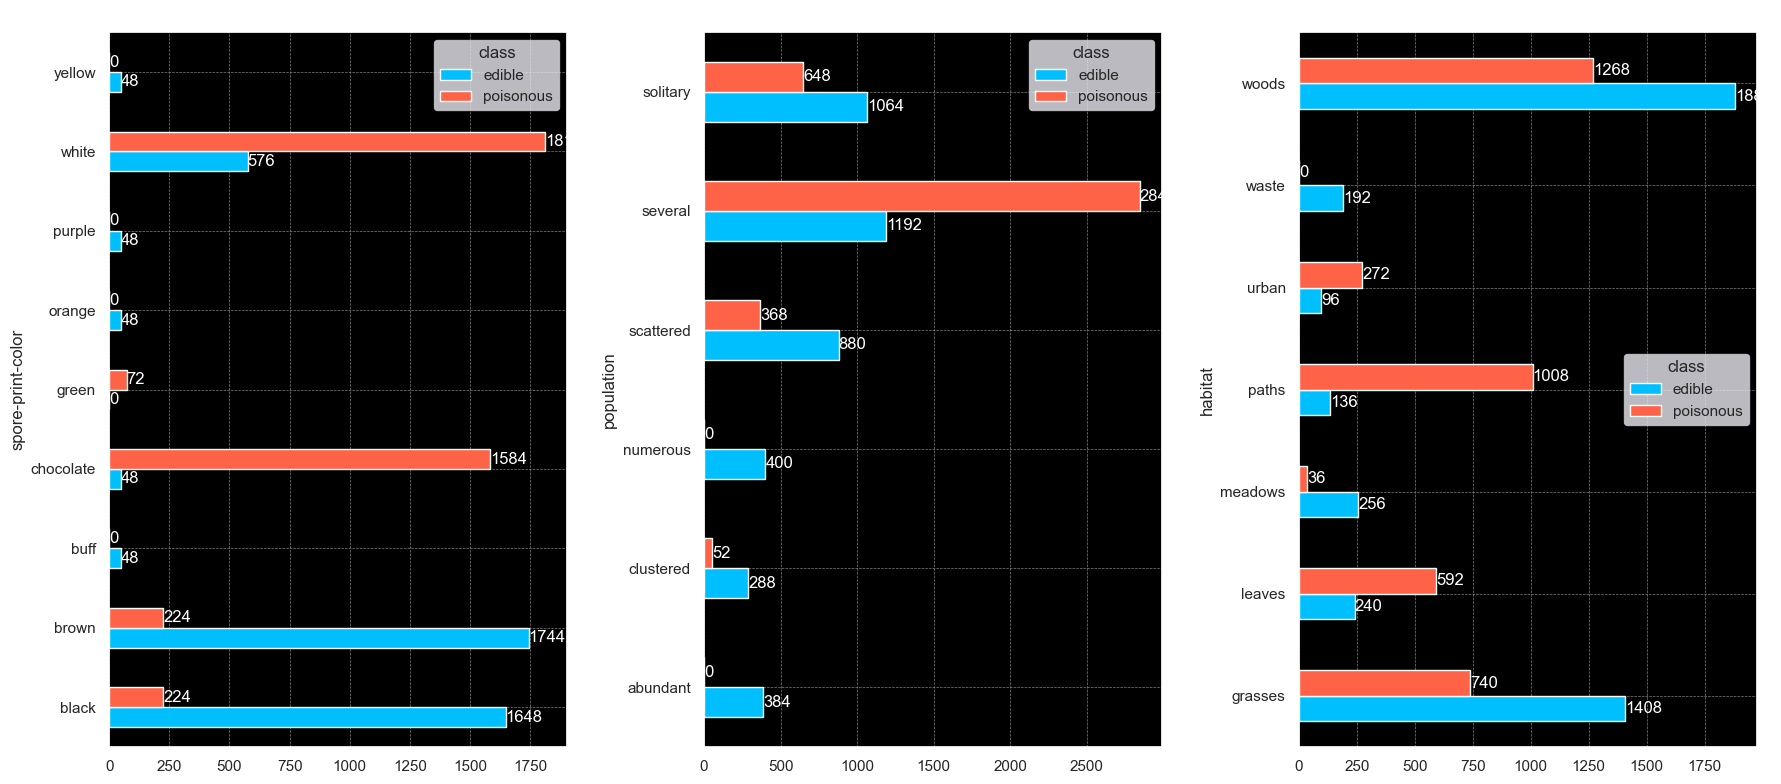

In [56]:
import matplotlib.pyplot as plt

# Set a dark style for the plots

plt.figure(figsize=(18, 8))  # Set figure size

# Define a color palette
colors = ['#00BFFF', '#FF6347']  # Bright blue and tomato red

# Spore Print Color vs Class
ax1 = plt.subplot2grid((1, 3), (0, 0))
SporePrintColorClass.plot(kind='barh', stacked=False, ax=ax1, color=colors)
for i in ax1.containers:
    ax1.bar_label(i, color='white')  # Set bar label color to white
plt.title("Spore Print Color vs Class", fontsize=14, fontweight='bold', color='white')
ax1.set_facecolor('black')  # Set background to black
ax1.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Population vs Class
ax2 = plt.subplot2grid((1, 3), (0, 1))
PopulationClass.plot(kind='barh', stacked=False, ax=ax2, color=colors)
for i in ax2.containers:
    ax2.bar_label(i, color='white')  # Set bar label color to white
plt.title("Population vs Class", fontsize=14, fontweight='bold', color='white')
ax2.set_facecolor('black')  # Set background to black
ax2.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Habitat vs Class
ax3 = plt.subplot2grid((1, 3), (0, 2))
HabitatClass.plot(kind='barh', stacked=False, ax=ax3, color=colors)
for i in ax3.containers:
    ax3.bar_label(i, color='white')  # Set bar label color to white
plt.title("Habitat vs Class", fontsize=14, fontweight='bold', color='white')
ax3.set_facecolor('black')  # Set background to black
ax3.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines

# Improve layout and show the plot
plt.tight_layout()
plt.show()


#### Summary:
 - The target column has 2 class type one is 'poisonous' which has 3916 counts and second is 'edible' which has 4208 counts so we have nearly equal counts for poisonous and edible classes in our data. Hence we can say that our data is balanced.
 - There are 4 types of cap-surface in a mushroom and also it suggests that 'edible' mushrooms do not have 'cap-surface' : 'g : grooves' according to our data.
 - The mushroom may or may not have bruises but still it could be poisonous or edible according to our data.
 - The mushroom can have Gill Spacing as Close or Crowded but still it could be poisonous or edible according to our data.
 - The mushroom can have Gill Size as Narrow or Broad but still it could be poisonous or edible according to our data.
 - The 'edible' mushroom do not have Gill Color : Buff, Green and 'poisonous' mushroom do not have Gill Color : Red, Orange according to our data.
 - The 'poisonous' mushroom do not have Stalk Root as Rooted type according to our data.
 - The mushroom can have Stalk-Surface-Above-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.
 - The mushroom can have Stalk-Surface-Below-Ring as Smooth, Fibrous, Silky or Scaly but still it could be poisonous or edible according to our data.
 - The 'edible' mushroom do not have Ring-Type as Large and None and 'poisonous' mushroom do not have Ring-Type as Flaring according to our data.
 - The 'edible' mushrooms do not have Spore-Print-Color as Green and 'poisonous' mushrooms do not have Spore-Print-Color as Purple, Orange, Yellow, Buff according to our data.
 - The 'poisonous' mushrooms do not have Population Type as Numerous and Abundant according to our data.
 - The 'poisonous' mushrooms do not have Habitat Type as Waste according to our data.